<a href="https://colab.research.google.com/github/Kavya2004/molgeo/blob/main/GNN_Shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch torch-geometric rdkit-pypi pandas numpy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 811.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import torch
print(torch.cuda.is_available()) #connect to gpu

False


In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv'
data = pd.read_csv(data_path, encoding='utf-8')
print(data.head())
print(data.shape)

   Unnamed: 0   refcode  ligand_index  eleccount  hapticity  h2-Benzene  \
0           0  AACANI11             0         10          0           0   
1           1  AACANI11             1        122          0           0   
2           2    AAZDCO             0         23          0           0   
3           3    AAZDCO             1         23          0           0   
4           4    AAZDCO             2         98          0           0   

   h4-Benzene  h2-Butadiene  h5-Cp  h3-Cp  ...  metal_totcharge  number  row  \
0           0             0      0      0  ...                2      28    4   
1           0             0      0      0  ...                2      28    4   
2           0             0      0      0  ...                3      27    4   
3           0             0      0      0  ...                3      27    4   
4           0             0      0      0  ...                3      27    4   

   group  valence_electrons  valence_to_donate  s_unfilled  p_unfill

In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())

Unnamed: 0           0
refcode              0
ligand_index         0
eleccount            0
hapticity            0
                    ..
valence_to_donate    0
s_unfilled           0
p_unfilled           0
d_unfilled           0
geometry             0
Length: 393, dtype: int64
0


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'refcode', 'ligand_index', 'eleccount', 'hapticity',
       'h2-Benzene', 'h4-Benzene', 'h2-Butadiene', 'h5-Cp', 'h3-Cp',
       ...
       'metal_totcharge', 'number', 'row', 'group', 'valence_electrons',
       'valence_to_donate', 's_unfilled', 'p_unfilled', 'd_unfilled',
       'geometry'],
      dtype='object', length=393)


In [ ]:
# Mount Google Drive (ensure access)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the CSV and inspect its content
import pandas as pd
data_path = '/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv'
try:
    original_data = pd.read_csv(data_path, encoding='utf-8')
    print("Original dataset shape:", original_data.shape)
    print("Original dataset columns:", original_data.columns.tolist())
    print("First 5 rows of original dataset:")
    print(original_data.head())
    print("Missing values per column:")
    print(original_data.isnull().sum())
except FileNotFoundError:
    print(f"File not found at {data_path}. Check if the file exists in Google Drive.")
except Exception as e:
    print(f"Error loading file: {e}")

# Check if refcode and ligand_index exist
print("\nRefcode column exists:", 'refcode' in original_data.columns)
print("Ligand_index column exists:", 'ligand_index' in original_data.columns)

# Verify data isn’t empty after basic loading (no cleaning yet)
if original_data.empty:
    print("DataFrame is empty. Possible reasons:")
    print("- File is empty or corrupted.")
    print("- Path is incorrect (check /content/drive/MyDrive/ligand_metal_with_labels_clean2.csv).")
    print("- Encoding or delimiter issues (e.g., try encoding='latin1' or sep=';').")
else:
    # Apply minimal cleaning to identify data loss
    cleaned_data = original_data.dropna(subset=['refcode', 'ligand_index'])  # Drop only if these are NaN
    print("\nShape after minimal cleaning (keeping refcode, ligand_index):", cleaned_data.shape)
    print("Unique refcodes after minimal cleaning:", len(cleaned_data['refcode'].unique()))

Mounted at /content/drive
Original dataset shape: (82880, 393)
Original dataset columns: ['Unnamed: 0', 'refcode', 'ligand_index', 'eleccount', 'hapticity', 'h2-Benzene', 'h4-Benzene', 'h2-Butadiene', 'h5-Cp', 'h3-Cp', 'h4-Butadiene', 'h4-Enone', 'h6-Benzene', 'h3-Allyl', 'natoms', 'numH', 'lig_totmconnec', 'lig_totconnec', 'lig_totcharge', 'ABC', 'ABCGG', 'nAcid', 'nBase', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nSpiro', 'nBridgehead', 'nHetero', 'nH', 'nB', 'nC', 'nN', 'nO', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'nX', 'BalabanJ', 'BertzCT', 'nBonds', 'nBondsO', 'nBondsS', 'nBondsD', 'nBondsT', 'nBondsA', 'nBondsM', 'nBondsKS', 'nBondsKD', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3', 'C2SP3', 'C3SP3', 'C4SP3', 'FCSP3', 'SZ', 'Sm', 'Sv', 'Sse', 'Spe', 'Sare', 'Sp', 'Si', 'MZ', 'Mm', 'Mv', 'Mse', 'Mpe', 'Mare', 'Mp', 'Mi', 'SpAbs_D', 'SpMax_D', 'SpDiam_D', 'SpAD_D', 'SpMAD_D', 'LogEE_D', 'VE1_D', 'VE2_D', 'VE3_D', 'VR1_D', 'VR2_D', 'ECIndex', 'fragCpx', 'fMF', 'nHBAcc

In [ ]:
print("\nVerifying derived features:")
print("Ligand_SMILES exists:", 'Ligand_SMILES' in data.columns)
print("Ligand_Fingerprint exists:", 'Ligand_Fingerprint' in data.columns)
print("Coordination_Number exists:", 'Coordination_Number' in data.columns)
print("Metal_Atomic_Number exists:", 'Metal_Atomic_Number' in data.columns)
print("Metal_d_Electrons exists:", 'Metal_d_Electrons' in data.columns)


Verifying derived features:
Ligand_SMILES exists: False
Ligand_Fingerprint exists: False
Coordination_Number exists: False
Metal_Atomic_Number exists: False
Metal_d_Electrons exists: False


In [ ]:
print(data.columns.tolist())

['Unnamed: 0', 'refcode', 'ligand_index', 'eleccount', 'hapticity', 'h2-Benzene', 'h4-Benzene', 'h2-Butadiene', 'h5-Cp', 'h3-Cp', 'h4-Butadiene', 'h4-Enone', 'h6-Benzene', 'h3-Allyl', 'natoms', 'numH', 'lig_totmconnec', 'lig_totconnec', 'lig_totcharge', 'ABC', 'ABCGG', 'nAcid', 'nBase', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nSpiro', 'nBridgehead', 'nHetero', 'nH', 'nB', 'nC', 'nN', 'nO', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'nX', 'BalabanJ', 'BertzCT', 'nBonds', 'nBondsO', 'nBondsS', 'nBondsD', 'nBondsT', 'nBondsA', 'nBondsM', 'nBondsKS', 'nBondsKD', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3', 'C2SP3', 'C3SP3', 'C4SP3', 'FCSP3', 'SZ', 'Sm', 'Sv', 'Sse', 'Spe', 'Sare', 'Sp', 'Si', 'MZ', 'Mm', 'Mv', 'Mse', 'Mpe', 'Mare', 'Mp', 'Mi', 'SpAbs_D', 'SpMax_D', 'SpDiam_D', 'SpAD_D', 'SpMAD_D', 'LogEE_D', 'VE1_D', 'VE2_D', 'VE3_D', 'VR1_D', 'VR2_D', 'ECIndex', 'fragCpx', 'fMF', 'nHBAcc', 'nHBDon', 'Lipinski', 'GhoseFilter', 'FilterItLogS', 'VMcGowan', 'LabuteASA', 'PEOE_VS

In [ ]:
print(data['geometry'].head())

0    pyramid_sq
1    pyramid_sq
2    octahedral
3    octahedral
4    octahedral
Name: geometry, dtype: object


In [ ]:
'row' in data.columns  # Should return True if it exists


True

In [ ]:
print("Refcode exists:", 'refcode' in data.columns)
print("Ligand_index exists:", 'ligand_index' in data.columns)
print("Geometry exists:", 'geometry' in data.columns)
print("Number exists:", 'number' in data.columns)
print("Metal_totcharge exists:", 'metal_totcharge' in data.columns)

Refcode exists: True
Ligand_index exists: True
Geometry exists: True
Number exists: True
Metal_totcharge exists: True


**SMILES**
1. Atoms
2. Bonds
3. Branches
4. Rings

In [ ]:
!unzip /content/drive/MyDrive/complexes_smiles.zip -d /content/complexes_smiles/

Archive:  /content/drive/MyDrive/complexes_smiles.zip
  inflating: /content/complexes_smiles/Cr_complexes_smiles.csv  
  inflating: /content/complexes_smiles/Fe_complexes_smiles.csv  
  inflating: /content/complexes_smiles/Re_complexes_smiles.csv  
  inflating: /content/complexes_smiles/Co_complexes_smiles.csv  
  inflating: /content/complexes_smiles/Ni_complexes_smiles.csv  
  inflating: /content/complexes_smiles/Ru_complexes_smiles.csv  
  inflating: /content/complexes_smiles/Cu_complexes_smiles.csv  
  inflating: /content/complexes_smiles/Mn_complexes_smiles.csv  


In [ ]:
!ls /content/complexes_smiles/

Co_complexes_smiles.csv  Cu_complexes_smiles.csv  Mn_complexes_smiles.csv  Re_complexes_smiles.csv
Cr_complexes_smiles.csv  Fe_complexes_smiles.csv  Ni_complexes_smiles.csv  Ru_complexes_smiles.csv


In [ ]:
import pandas as pd

complexes_df = pd.read_csv('/content/complexes_smiles/Fe_complexes_smiles.csv')
print(complexes_df.head())

   Unnamed: 0   refcode                                             SMILES
0           0    ABEMAX  ['[H]c1c(C([H])([H])[H])c([H])c(C([H])([H])[H]...
1           1    ABIJEB  ['[H]N=O', '[H]SC([H])([H])C([H])([H])N1C([H])...
2           2    ABITEM  ['[H][N-]C#[S+]', '[H]c1nc(C([H])([H])N(C([H])...
3           3  ABITUC01  ['[H][N-]C#[S+]', '[H]c1nc(C([H])([H])N(C([H])...
4           4    ABOZOJ  ['[H]Oc1c(C([H])([H])N([H])C([H])([H])C([H])([...


In [ ]:
print(complexes_df.columns.tolist())

['Unnamed: 0', 'refcode', 'SMILES']


In [ ]:
# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

!pip install torch torch-geometric rdkit-pypi pandas numpy networkx torchmetrics

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 22.4 MB/s eta 0:00:00
Using device: cuda


**Make Graphs**

Graph with just smiles

In [ ]:
import pandas as pd
import glob
import torch
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder

# Load labeled data
labeled_df = pd.read_csv('/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv')

# Load all SMILES CSV files
smiles_files = glob.glob('/content/complexes_smiles/*_complexes_smiles.csv')
smiles_dfs = [pd.read_csv(file) for file in smiles_files]
all_smiles_df = pd.concat(smiles_dfs, ignore_index=True)

# Handle duplicate refcodes
if all_smiles_df['refcode'].duplicated().any():
    print("Warning: Duplicate refcodes found. Dropping duplicates.")
    all_smiles_df = all_smiles_df.drop_duplicates(subset='refcode')

# Merge with labeled data
merged_df = pd.merge(labeled_df, all_smiles_df[['refcode', 'SMILES']], on='refcode', how='inner')
print(f"Number of merged entries: {len(merged_df)}")

# Encode geometry labels
#ex: {'tetrahedral': 0, 'octahedral': 1, 'square planar': 2}
le = LabelEncoder()
merged_df['geometry_encoded'] = le.fit_transform(merged_df['geometry'])
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Convert SMILES to graph with edge validation
def smiles_to_graph(smiles):
    try:
        if isinstance(smiles, str) and smiles.startswith('['):
            smiles = eval(smiles)[0]  # Handle list-like SMILES
        mol = Chem.MolFromSmiles(smiles)
        if mol is None or mol.GetNumAtoms() == 0 or mol.GetNumBonds() == 0:
            return None
        AllChem.Compute2DCoords(mol)
        atom_features = [[atom.GetAtomicNum(), atom.GetDegree(), atom.GetFormalCharge()] for atom in mol.GetAtoms()]
        edge_index = []
        for bond in mol.GetBonds():
            i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
            edge_index.extend([[i, j], [j, i]])
        edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
        x = torch.tensor(atom_features, dtype=torch.float)
        return Data(x=x, edge_index=edge_index)
    except Exception as e:
        print(f"Error parsing SMILES {smiles}: {e}")
        return None

# Apply conversion and filter valid graphs
merged_df['graph'] = merged_df['SMILES'].apply(smiles_to_graph)
valid_df = merged_df[merged_df['graph'].notnull()].copy()
print(f"Number of valid graphs: {len(valid_df)}")

# Add batch attribute and validate edge_index
valid_df['graph'] = [
    Data(x=g.x, edge_index=g.edge_index, batch=torch.zeros(g.x.size(0), dtype=torch.long))
    for g in valid_df['graph']
    if g.edge_index.size(1) > 0  # Ensure graphs have edges
]
valid_df = valid_df[valid_df['graph'].apply(lambda x: x is not None and x.edge_index.size(1) > 0)].copy()
print(f"Number of valid graphs with edges: {len(valid_df)}")

# Save valid_df for debugging (optional)
valid_df.to_csv('/content/drive/MyDrive/valid_df_with_edges.csv', index=False)

Number of merged entries: 82880
Label mapping: {'bent': np.int64(0), 'linear': np.int64(1), 'octahedral': np.int64(2), 'planar_3': np.int64(3), 'planar_4': np.int64(4), 'planar_5': np.int64(5), 'prism': np.int64(6), 'pyramid_3': np.int64(7), 'pyramid_4': np.int64(8), 'pyramid_bi': np.int64(9), 'pyramid_sq': np.int64(10), 'tetrahedral': np.int64(11), 'tshape': np.int64(12)}
Number of valid graphs: 69976
Number of valid graphs with edges: 69976


Graph with molecular features and smiles

In [ ]:
import pandas as pd
import glob
import torch
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder, StandardScaler
import ast
import numpy as np

# Load labeled data
labeled_df = pd.read_csv('/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv')

# Load all SMILES CSV files
smiles_files = glob.glob('/content/complexes_smiles/*_complexes_smiles.csv')
smiles_dfs = [pd.read_csv(file) for file in smiles_files]
all_smiles_df = pd.concat(smiles_dfs, ignore_index=True)

# Handle duplicate refcodes
if all_smiles_df['refcode'].duplicated().any():
    print("Warning: Duplicate refcodes found. Dropping duplicates.")
    all_smiles_df = all_smiles_df.drop_duplicates(subset='refcode')

# Merge with labeled data
merged_df = pd.merge(labeled_df, all_smiles_df[['refcode', 'SMILES']], on='refcode', how='inner')
print(f"Number of merged entries: {len(merged_df)}")

# Encode geometry labels
le = LabelEncoder()
merged_df['geometry_encoded'] = le.fit_transform(merged_df['geometry'])
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Standardize molecular features
scaler = StandardScaler()

def clean_smiles(smiles):
    """Handle SMILES stored as Python list strings (e.g., "['CCO']" -> "CCO")"""
    if isinstance(smiles, str):
        if smiles.startswith('[') and smiles.endswith(']'):
            try:
                # Safely evaluate string as Python list
                cleaned = ast.literal_eval(smiles)[0]
                return str(cleaned)
            except:
                return smiles.strip("[]'\"")  # Fallback: remove brackets/quotes
    return smiles

def compute_molecular_features(smiles):
    try:
        cleaned_smiles = clean_smiles(smiles)
        mol = Chem.MolFromSmiles(cleaned_smiles, sanitize=False)
        if mol is None:
            return None

        if mol.GetNumBonds() == 0:
            mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol, allHsExplicit=False))

        Chem.SanitizeMol(mol)

        return [
            Descriptors.ExactMolWt(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.NumRotatableBonds(mol),
            Descriptors.NumAromaticRings(mol) + Descriptors.NumAliphaticRings(mol)
        ]
    except Exception as e:
        print(f"Error computing features for SMILES {smiles}: {e}")
        return None


# Compute molecular properties
merged_df['molecular_features'] = merged_df['SMILES'].apply(compute_molecular_features)
filtered_df = merged_df[merged_df['molecular_features'].notnull()].copy()

# Check for empty dataset
if len(filtered_df) == 0:
    raise ValueError("No valid molecules found after filtering. Check your SMILES input data.")

# Convert list of features to a tensor for scaling
molecular_features = np.array(filtered_df['molecular_features'].tolist())

# Scale the features
if molecular_features.size > 0:
    scaled_features = scaler.fit_transform(molecular_features)
    filtered_df['molecular_features'] = scaled_features.tolist()
else:
    raise ValueError("No valid molecular features to scale. Check compute_molecular_features()")

# Convert SMILES to graph with additional features
def smiles_to_graph(smiles, molecular_features=None):
    try:
        # Clean SMILES format
        cleaned_smiles = clean_smiles(smiles)

        # Try parsing with explicit hydrogens first
        mol = Chem.MolFromSmiles(cleaned_smiles, sanitize=False)
        if mol is None:
            return None

        # If the molecule has no bonds, try removing explicit hydrogens
        if mol.GetNumBonds() == 0:
            mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol, allHsExplicit=False))

        # Sanitize and compute 2D coordinates
        Chem.SanitizeMol(mol)
        AllChem.Compute2DCoords(mol)

        if mol.GetNumAtoms() == 0:
            print(f"Invalid molecule (no atoms): {cleaned_smiles}")
            return None

        # Atom-level features
        atom_features = []
        for atom in mol.GetAtoms():
            atom_features.append([
                atom.GetAtomicNum(),
                atom.GetDegree(),
                atom.GetFormalCharge(),
                atom.GetIsAromatic(),
                atom.GetTotalNumHs(includeNeighbors=True)  # Include total H count
            ])

        atom_features_tensor = torch.tensor(atom_features, dtype=torch.float)

        # Add molecular features to node features
        if molecular_features is not None:
            mol_features_tensor = torch.tensor(molecular_features, dtype=torch.float)
            atom_features_tensor = torch.cat([
                atom_features_tensor,
                mol_features_tensor.repeat(atom_features_tensor.size(0), 1)
            ], dim=1)

        # Edge list (bond information)
        edge_index = []
        for bond in mol.GetBonds():
            i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
            edge_index.extend([[i, j], [j, i]])

        # If no bonds, create self-loops
        if not edge_index:
            edge_index = [[i, i] for i in range(mol.GetNumAtoms())]

        edge_index_tensor = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

        return Data(x=atom_features_tensor, edge_index=edge_index_tensor)

    except Exception as e:
        print(f"Error parsing SMILES {cleaned_smiles}: {e}")
        return None


# Apply conversion
filtered_df['graph'] = filtered_df.apply(
    lambda row: smiles_to_graph(row['SMILES'], row['molecular_features']),
    axis=1
)

# Filter valid graphs
valid_df = filtered_df[filtered_df['graph'].notnull()].copy()
print(f"Number of valid graphs: {len(valid_df)}")

# Validate edge_index and finalize graphs
valid_graphs = []
for g in valid_df['graph']:
    if g.edge_index.size(1) > 0:
        valid_graphs.append(Data(
            x=g.x,
            edge_index=g.edge_index,
            batch=torch.zeros(g.x.size(0), dtype=torch.long)
        ))

valid_df = valid_df.iloc[:len(valid_graphs)].copy()
valid_df['graph'] = valid_graphs
print(f"Number of valid graphs with edges: {len(valid_df)}")

# Save valid dataset
valid_df.to_csv('/content/drive/MyDrive/valid_df_with_features.csv', index=False)

Number of merged entries: 82880
Label mapping: {'bent': np.int64(0), 'linear': np.int64(1), 'octahedral': np.int64(2), 'planar_3': np.int64(3), 'planar_4': np.int64(4), 'planar_5': np.int64(5), 'prism': np.int64(6), 'pyramid_3': np.int64(7), 'pyramid_4': np.int64(8), 'pyramid_bi': np.int64(9), 'pyramid_sq': np.int64(10), 'tetrahedral': np.int64(11), 'tshape': np.int64(12)}
Number of valid graphs: 82880
Number of valid graphs with edges: 82880


Visual Representation of Graph

In [ ]:
!pip install matplotlib

Graph Dataset Summary:
--------------------------------------------------
Total Graphs: 82880

Node Features Statistics:
          num_nodes  num_features
count  82880.000000       82880.0
mean      20.648769          10.0
std       19.333290           0.0
min        1.000000          10.0
25%        4.000000          10.0
50%       15.000000          10.0
75%       31.000000          10.0
max      296.000000          10.0

Edge Statistics:
          num_edges
count  82880.000000
mean      41.809447
std       41.287665
min        1.000000
25%        6.000000
50%       30.000000
75%       64.000000
max      640.000000

Batch Size Distribution:
batch_size
3      11134
2       5768
4       4353
6       3667
34      2774
       ...  
296        1
140        1
133        1
180        1
141        1
Name: count, Length: 150, dtype: int64


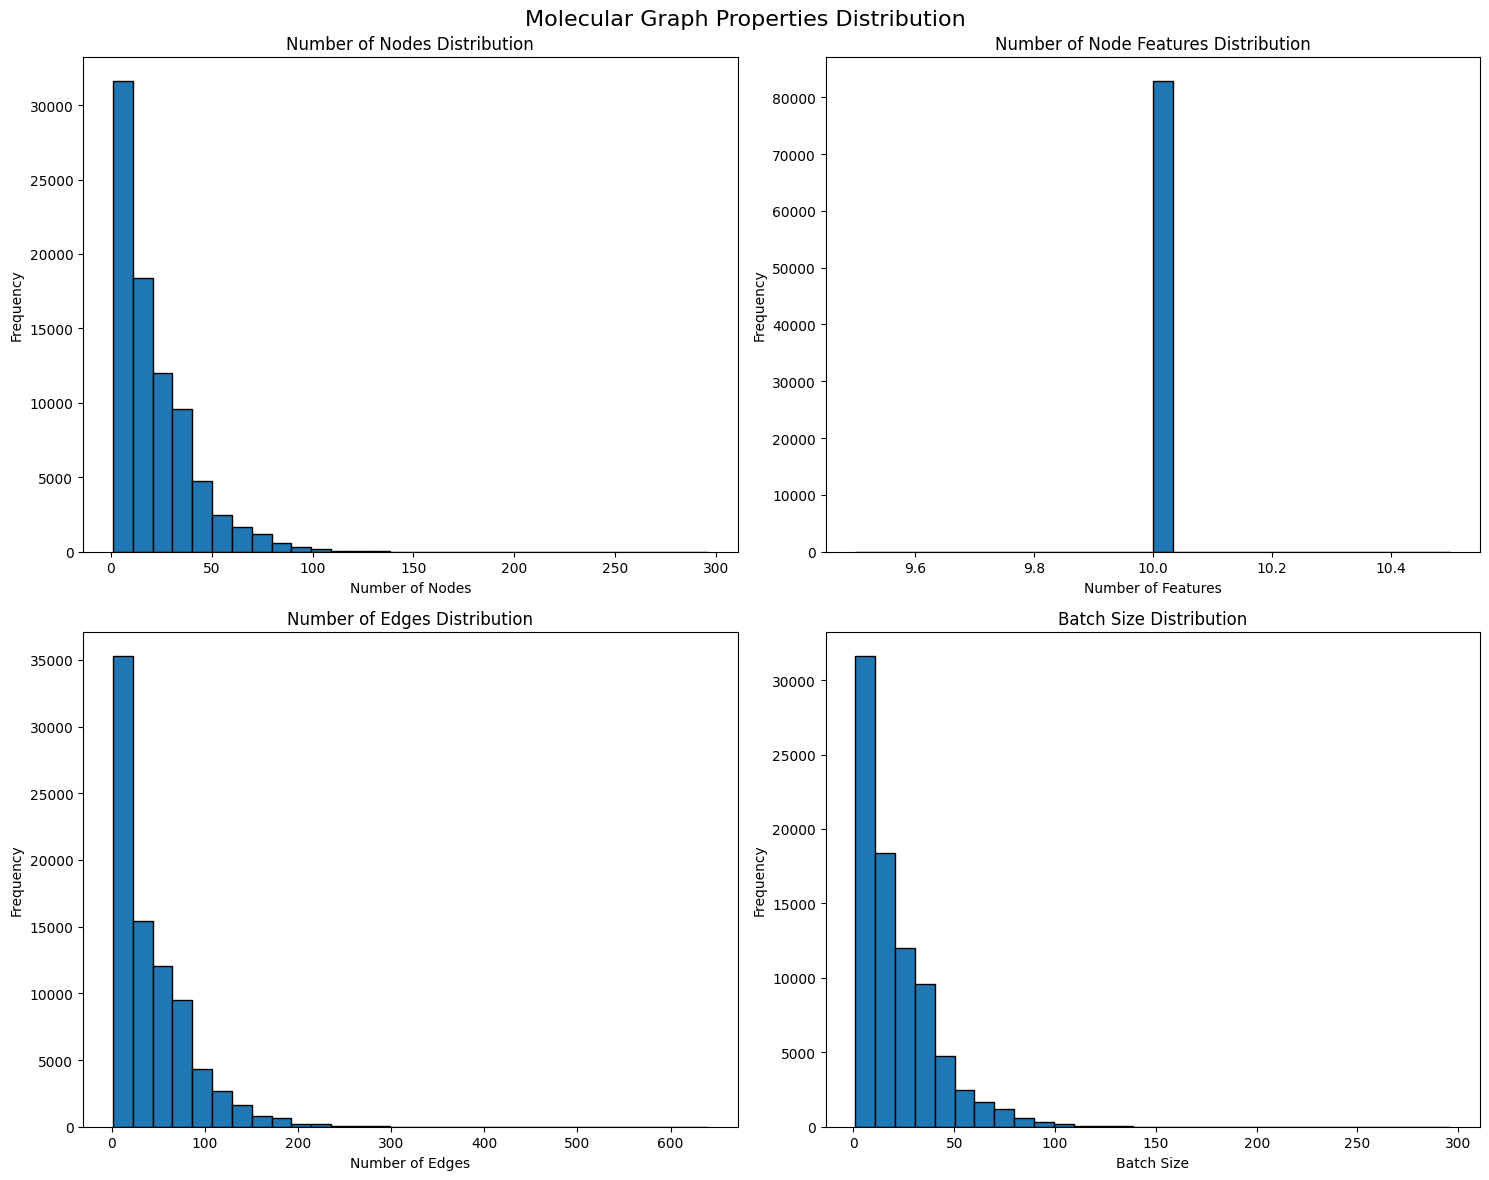

In [ ]:
import pandas as pd
import torch
import ast
import networkx as nx
import matplotlib.pyplot as plt
import re

def extract_graph_details(graph_str):
    """
    Extract detailed information from the graph string representation
    """
    details = {}

    # Extract x (node features) dimensions
    x_match = re.search(r'x=\[(\d+), (\d+)\]', graph_str)
    if x_match:
        details['num_nodes'] = int(x_match.group(1))
        details['num_features'] = int(x_match.group(2))

    # Extract edge index dimensions
    edge_match = re.search(r'edge_index=\[(\d+), (\d+)\]', graph_str)
    if edge_match:
        details['num_edges'] = int(edge_match.group(2))

    # Extract batch information
    batch_match = re.search(r'batch=\[(\d+)\]', graph_str)
    if batch_match:
        details['batch_size'] = int(batch_match.group(1))

    return details

def summarize_graphs(df):
    """
    Provide a comprehensive summary of graphs in the DataFrame
    """
    # Collect graph details
    graph_details = []
    for graph_str in df['graph']:
        details = extract_graph_details(graph_str)
        graph_details.append(details)

    # Convert to DataFrame for easy analysis
    details_df = pd.DataFrame(graph_details)

    print("Graph Dataset Summary:")
    print("-" * 50)
    print(f"Total Graphs: {len(df)}")
    print("\nNode Features Statistics:")
    print(details_df[['num_nodes', 'num_features']].describe())

    print("\nEdge Statistics:")
    print(details_df[['num_edges']].describe())

    print("\nBatch Size Distribution:")
    print(details_df['batch_size'].value_counts())

def visualize_graph_distributions(df):
    """
    Create visualizations of graph properties
    """
    # Extract details
    graph_details = []
    for graph_str in df['graph']:
        details = extract_graph_details(graph_str)
        graph_details.append(details)
    details_df = pd.DataFrame(graph_details)

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Molecular Graph Properties Distribution', fontsize=16)

    # Number of Nodes Distribution
    axs[0, 0].hist(details_df['num_nodes'], bins=30, edgecolor='black')
    axs[0, 0].set_title('Number of Nodes Distribution')
    axs[0, 0].set_xlabel('Number of Nodes')
    axs[0, 0].set_ylabel('Frequency')

    # Number of Features Distribution
    axs[0, 1].hist(details_df['num_features'], bins=30, edgecolor='black')
    axs[0, 1].set_title('Number of Node Features Distribution')
    axs[0, 1].set_xlabel('Number of Features')
    axs[0, 1].set_ylabel('Frequency')

    # Number of Edges Distribution
    axs[1, 0].hist(details_df['num_edges'], bins=30, edgecolor='black')
    axs[1, 0].set_title('Number of Edges Distribution')
    axs[1, 0].set_xlabel('Number of Edges')
    axs[1, 0].set_ylabel('Frequency')

    # Batch Size Distribution
    axs[1, 1].hist(details_df['batch_size'], bins=30, edgecolor='black')
    axs[1, 1].set_title('Batch Size Distribution')
    axs[1, 1].set_xlabel('Batch Size')
    axs[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Load the DataFrame
df = pd.read_csv('/content/drive/MyDrive/valid_df_with_features.csv')

# Run analysis
summarize_graphs(df)
visualize_graph_distributions(df)

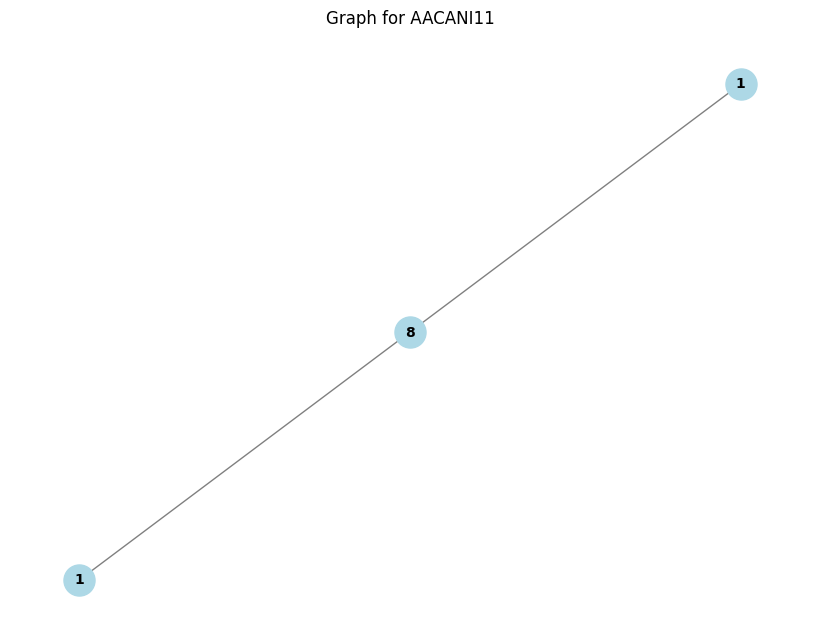

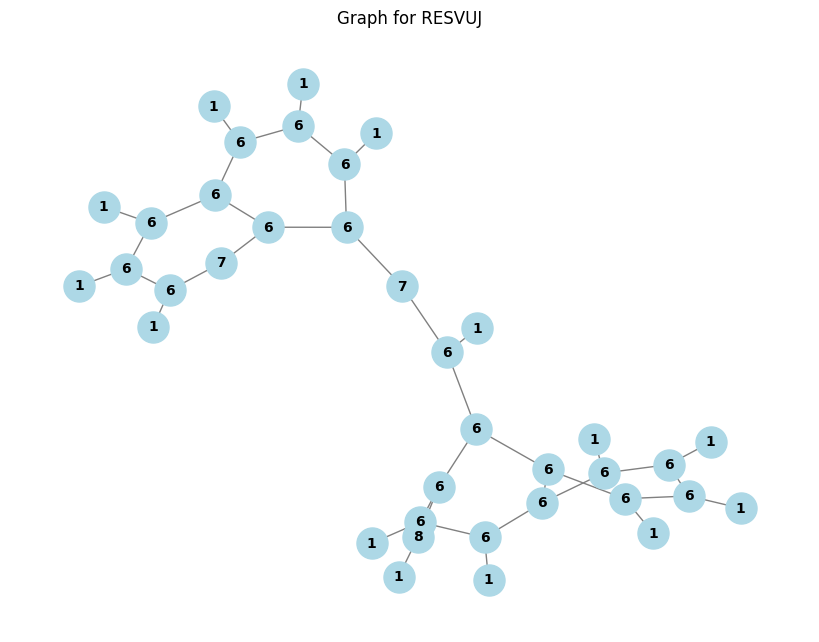

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to visualize PyTorch Geometric graph using NetworkX
def visualize_graph(data, title="Graph"):
    """
    Visualize a PyTorch Geometric Data object as a graph using NetworkX.
    """
    # Convert PyTorch Geometric Data to NetworkX graph
    G = nx.Graph()

    # Add nodes with atomic number as labels
    num_nodes = data.x.size(0)
    atomic_nums = data.x[:, 0].tolist()  # First feature is atomic number
    for i in range(num_nodes):
        G.add_node(i, label=int(atomic_nums[i]))

    # Add edges from edge_index
    edge_index = data.edge_index.t().tolist()
    for edge in edge_index:
        G.add_edge(edge[0], edge[1])

    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for visualization
    labels = nx.get_node_attributes(G, 'label')

    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue',
            node_size=500, font_size=10, font_weight='bold', edge_color='gray')
    plt.title(title)
    plt.show()

# Visualize a few example graphs from valid_df
num_examples = 1  # Number of graphs to visualize
for i in range(min(num_examples, len(valid_df))):
    graph_data = valid_df['graph'].iloc[i]  # Access the Data object
    refcode = valid_df['refcode'].iloc[i]   # Use refcode as title
    visualize_graph(graph_data, title=f"Graph for {refcode}")

# Optional: Visualize a random sample
sample_df = valid_df.sample(n=min(num_examples, len(valid_df)))
for i, row in sample_df.iterrows():
    visualize_graph(row['graph'], title=f"Graph for {row['refcode']}")

**Pretraining**

Approach 1

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool
from torch.nn import LayerNorm

# Define GATPretrain Model
class GATPretrain(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GATPretrain, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)
        self.norm1 = LayerNorm(hidden_dim * 4)  # LayerNorm after GATConv1
        self.conv2 = GATConv(hidden_dim * 4, output_dim, heads=1, concat=True)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)  # Apply normalization
        x = self.conv2(x, edge_index)
        return x

# Initialize Model (use device from Step 1)
input_dim = 3  # [atomic number, degree, charge]
hidden_dim = 32  # Reduced for stability
output_dim = input_dim
model_pretrain = GATPretrain(input_dim, hidden_dim, output_dim).to(device)  # Assumes device from Step 1
optimizer = torch.optim.Adam(model_pretrain.parameters(), lr=1e-4)

# Define Pretraining Function
def pretrain_epoch(graphs):
    model_pretrain.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0
    skip_reasons = {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 0, 'invalid_loss': 0}

    for i, data in enumerate(graphs):
        # Skip invalid or empty graphs
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skip_reasons['empty_graph'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)

        # Normalize input features per feature column
        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        # Check for NaN or inf in input features
        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skip_reasons['nan_inf_input'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer.zero_grad()
        out = model_pretrain(data)

        # Check for NaN or inf in model output
        if torch.isnan(out).any() or torch.isinf(out).any():
            skip_reasons['nan_inf_output'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        # Create mask and ensure at least one element is selected
        mask = torch.rand(data.x.size(0), device=device) < 0.8
        if mask.sum() == 0:
            skip_reasons['empty_mask'] += 1
            skipped_graphs += 1
            continue

        # Compute loss using Huber Loss
        loss_fn = torch.nn.SmoothL1Loss()
        loss = loss_fn(out[mask], data.x[mask])

        if torch.isnan(loss) or torch.isinf(loss):
            skip_reasons['invalid_loss'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        # Backpropagation with gradient clipping
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_pretrain.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
        valid_graphs += 1

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs. Reasons: {skip_reasons}")
    return total_loss / max(1, valid_graphs)

# Run Pretraining
for epoch in range(20):
    graphs = valid_df['graph'].tolist()  # Assumes valid_df from Step 2
    loss = pretrain_epoch(graphs)
    print(f'Pretrain Epoch {epoch+1}/20, Loss: {loss:.4f}')

# Save the model

torch.save(model_pretrain.state_dict(), '/content/drive/MyDrive/pretrained_gat.pth')

Skipped 252 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 252, 'invalid_loss': 0}
Pretrain Epoch 1/20, Loss: 0.1215
Skipped 263 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 263, 'invalid_loss': 0}
Pretrain Epoch 2/20, Loss: 0.0862
Skipped 261 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 261, 'invalid_loss': 0}
Pretrain Epoch 3/20, Loss: 0.0810
Skipped 287 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 287, 'invalid_loss': 0}
Pretrain Epoch 4/20, Loss: 0.0782
Skipped 314 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 314, 'invalid_loss': 0}
Pretrain Epoch 5/20, Loss: 0.0762
Skipped 238 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 238, 'invalid_

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from torch_geometric.nn import GATConv, global_mean_pool
from torch.nn import LayerNorm
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import glob
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Preprocess data (same as above, included here for completeness)
def preprocess_data():
    labeled_df = pd.read_csv('/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv')
    smiles_files = glob.glob('/content/complexes_smiles/*_complexes_smiles.csv')
    smiles_dfs = [pd.read_csv(file) for file in smiles_files]
    all_smiles_df = pd.concat(smiles_dfs, ignore_index=True)

    if all_smiles_df['refcode'].duplicated().any():
        print("Warning: Duplicate refcodes found. Dropping duplicates.")
        all_smiles_df = all_smiles_df.drop_duplicates(subset='refcode')

    merged_df = pd.merge(labeled_df, all_smiles_df[['refcode', 'SMILES']], on='refcode', how='inner')
    print(f"Number of merged entries: {len(merged_df)}")

    def clean_smiles(smiles):
        try:
            if isinstance(smiles, str) and smiles.startswith('[') and smiles.endswith(']'):
                smiles = smiles[1:-1]
                smiles_parts = smiles.split(',')
                if len(smiles_parts) > 0:
                    cleaned_smiles = smiles_parts[0].strip().strip("'").strip('"')
                    if cleaned_smiles:
                        return cleaned_smiles
            elif isinstance(smiles, str):
                return smiles
            return None
        except Exception as e:
            print(f"Error cleaning SMILES {smiles}: {e}")
            return None

    def smiles_to_graph(smiles, input_dim=3):
        try:
            cleaned_smiles = clean_smiles(smiles)
            if not cleaned_smiles:
                return None

            mol = Chem.MolFromSmiles(cleaned_smiles)
            if mol is None or mol.GetNumAtoms() == 0 or mol.GetNumBonds() == 0:
                return None
            AllChem.Compute2DCoords(mol)

            atom_features = [[atom.GetAtomicNum(), atom.GetDegree(), atom.GetFormalCharge()] for atom in mol.GetAtoms()]
            edge_index = []
            for bond in mol.GetBonds():
                i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
                edge_index.extend([[i, j], [j, i]])
            edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
            x = torch.tensor(atom_features, dtype=torch.float)
            return Data(x=x, edge_index=edge_index)
        except Exception as e:
            print(f"Error parsing SMILES {smiles}: {e}")
            return None

    merged_df['graph'] = merged_df['SMILES'].apply(lambda x: smiles_to_graph(x, input_dim=3))
    valid_df = merged_df[merged_df['graph'].notnull()].copy()
    print(f"Number of valid graphs: {len(valid_df)}")

    valid_df['graph'] = [
        Data(x=g.x, edge_index=g.edge_index, batch=torch.zeros(g.x.size(0), dtype=torch.long))
        for g in valid_df['graph']
        if g.edge_index.size(1) > 0
    ]
    valid_df = valid_df[valid_df['graph'].apply(lambda x: x is not None and x.edge_index.size(1) > 0)].copy()
    print(f"Number of valid graphs with edges: {len(valid_df)}")

    return valid_df

# Load and preprocess data
valid_df = preprocess_data()
graphs = valid_df['graph'].tolist()

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define GATPretrain Model
class GATPretrain(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GATPretrain, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)
        self.norm1 = LayerNorm(hidden_dim * 4)
        self.conv2 = GATConv(hidden_dim * 4, output_dim, heads=1, concat=True)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize Model
input_dim = 3  # [atomic number, degree, charge]
hidden_dim = 32
output_dim = input_dim
model_pretrain = GATPretrain(input_dim, hidden_dim, output_dim).to(device)
optimizer = torch.optim.Adam(model_pretrain.parameters(), lr=1e-4)

# Define Pretraining Function
def pretrain_epoch(graphs):
    model_pretrain.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0
    skip_reasons = {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 0, 'invalid_loss': 0}

    for i, data in enumerate(graphs):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skip_reasons['empty_graph'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)

        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skip_reasons['nan_inf_input'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer.zero_grad()
        out = model_pretrain(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skip_reasons['nan_inf_output'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        mask = torch.rand(data.x.size(0), device=device) < 0.8
        if mask.sum() == 0:
            skip_reasons['empty_mask'] += 1
            skipped_graphs += 1
            continue

        loss_fn = torch.nn.SmoothL1Loss()
        loss = loss_fn(out[mask], data.x[mask])

        if torch.isnan(loss) or torch.isinf(loss):
            skip_reasons['invalid_loss'] += 1
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_pretrain.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
        valid_graphs += 1

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs. Reasons: {skip_reasons}")
    return total_loss / max(1, valid_graphs)

# Run Pretraining
for epoch in range(20):
    loss = pretrain_epoch(graphs)
    print(f'Pretrain Epoch {epoch+1}/20, Loss: {loss:.4f}')

# Save the model
torch.save(model_pretrain.state_dict(), '/content/drive/MyDrive/pretrained_gat.pth')
print("Pretrained model saved as pretrained_gat.pth")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of merged entries: 82880
Number of valid graphs: 69976
Number of valid graphs with edges: 69976
Using device: cpu
Skipped 271 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 271, 'invalid_loss': 0}
Pretrain Epoch 1/20, Loss: 0.1237
Skipped 286 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 286, 'invalid_loss': 0}
Pretrain Epoch 2/20, Loss: 0.0849
Skipped 266 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 266, 'invalid_loss': 0}
Pretrain Epoch 3/20, Loss: 0.0796
Skipped 280 out of 69976 graphs. Reasons: {'empty_graph': 0, 'nan_inf_input': 0, 'nan_inf_output': 0, 'empty_mask': 280, 'invalid_loss': 0}
Pretrain Epoch 4/20, Loss: 0.0777
Skipped 250 out of 69976 graphs. Reasons: {'empty_grap

Approach 2 - Geometry-Aware Graph Neural Network (GNN)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool
from torch_geometric.data import DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class GeometryAwareGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, num_layers=5):
        super().__init__()
        self.atom_conv = GATConv(input_dim, hidden_dim, heads=4, concat=False)
        self.layers = nn.ModuleList([
            GATConv(hidden_dim, hidden_dim, heads=4, concat=False) for _ in range(num_layers)
        ])
        self.spatial_attn = nn.MultiheadAttention(hidden_dim, num_heads=4)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.atom_conv(x, edge_index))

        for layer in self.layers:
            x = F.elu(layer(x, edge_index)) + x  # Residual connection

        # Global pooling
        x = global_mean_pool(x, batch)

        return x

# Pretraining wrapper
class PretrainingWrapper(nn.Module):
    def __init__(self, gnn, num_geometry_types):
        super().__init__()
        self.gnn = gnn
        self.projection = nn.Linear(256, 128)
        self.geometry_cls = nn.Linear(128, num_geometry_types)

    def forward(self, data):
        x = self.gnn(data)
        x = self.projection(x)
        return self.geometry_cls(x)

# Pretraining function
def pretrain(model, train_loader, val_loader, epochs=100, lr=1e-4, device='cuda'):
    model = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    criterion = nn.CrossEntropyLoss()

    best_val_acc = 0
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            batch = batch.to(device)
            optimizer.zero_grad()
            out = model(batch)
            loss = criterion(out, batch.geometry_encoded)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            total_loss += loss.item()
            _, predicted = out.max(1)
            total += batch.geometry_encoded.size(0)
            correct += predicted.eq(batch.geometry_encoded).sum().item()

        train_acc = correct / total
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Train Acc: {train_acc:.4f}")

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for batch in val_loader:
                batch = batch.to(device)
                out = model(batch)
                _, predicted = out.max(1)
                val_total += batch.geometry_encoded.size(0)
                val_correct += predicted.eq(batch.geometry_encoded).sum().item()

        val_acc = val_correct / val_total
        print(f"Validation Accuracy: {val_acc:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_pretrained_model.pth')

        scheduler.step()

    print(f"Best Validation Accuracy: {best_val_acc:.4f}")

# Main execution
if __name__ == "__main__":
    # Assuming valid_df is your DataFrame with preprocessed data
    graphs = valid_df['graph'].tolist()
    labels = valid_df['geometry_encoded'].tolist()

    # Create PyTorch Geometric dataset
    dataset = [Data(x=g.x, edge_index=g.edge_index, geometry_encoded=torch.tensor(l, dtype=torch.long)) for g, l in zip(graphs, labels)]

    # Split dataset
    train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)

    # Create data loaders
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32)

    # Initialize model
    input_dim = dataset[0].x.size(1)  # Number of node features
    num_geometry_types = len(valid_df['geometry'].unique())
    gnn = GeometryAwareGNN(input_dim)
    model = PretrainingWrapper(gnn, num_geometry_types)

    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Pretrain
    pretrain(model, train_loader, val_loader, epochs=100, lr=1e-4, device=device)

    print("Pretraining completed!")


Using device: cpu


Epoch 1/100: 100%|██████████| 2072/2072 [10:44<00:00,  3.22it/s]


Epoch 1/100, Train Loss: 1.4198, Train Acc: 0.5535
Validation Accuracy: 0.5596


Epoch 2/100: 100%|██████████| 2072/2072 [10:25<00:00,  3.31it/s]


Epoch 2/100, Train Loss: 1.3538, Train Acc: 0.5640
Validation Accuracy: 0.5637


Epoch 3/100: 100%|██████████| 2072/2072 [10:26<00:00,  3.31it/s]


Epoch 3/100, Train Loss: 1.3359, Train Acc: 0.5687
Validation Accuracy: 0.5604


Epoch 4/100: 100%|██████████| 2072/2072 [10:25<00:00,  3.31it/s]


Epoch 4/100, Train Loss: 1.3224, Train Acc: 0.5728
Validation Accuracy: 0.5615


Epoch 5/100: 100%|██████████| 2072/2072 [08:14<00:00,  4.19it/s]


Epoch 5/100, Train Loss: 1.3128, Train Acc: 0.5741
Validation Accuracy: 0.5686


Epoch 6/100: 100%|██████████| 2072/2072 [08:03<00:00,  4.29it/s]


Epoch 6/100, Train Loss: 1.3025, Train Acc: 0.5749
Validation Accuracy: 0.5722


Epoch 7/100: 100%|██████████| 2072/2072 [08:00<00:00,  4.31it/s]


Epoch 7/100, Train Loss: 1.2934, Train Acc: 0.5761
Validation Accuracy: 0.5739


Epoch 8/100: 100%|██████████| 2072/2072 [07:57<00:00,  4.34it/s]


Epoch 8/100, Train Loss: 1.2834, Train Acc: 0.5775
Validation Accuracy: 0.5727


Epoch 9/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.35it/s]


Epoch 9/100, Train Loss: 1.2740, Train Acc: 0.5794
Validation Accuracy: 0.5739


Epoch 10/100: 100%|██████████| 2072/2072 [07:58<00:00,  4.33it/s]


Epoch 10/100, Train Loss: 1.2672, Train Acc: 0.5814
Validation Accuracy: 0.5719


Epoch 11/100: 100%|██████████| 2072/2072 [08:06<00:00,  4.26it/s]


Epoch 11/100, Train Loss: 1.2608, Train Acc: 0.5823
Validation Accuracy: 0.5767


Epoch 12/100: 100%|██████████| 2072/2072 [08:01<00:00,  4.30it/s]


Epoch 12/100, Train Loss: 1.2519, Train Acc: 0.5848
Validation Accuracy: 0.5840


Epoch 13/100: 100%|██████████| 2072/2072 [07:56<00:00,  4.34it/s]


Epoch 13/100, Train Loss: 1.2461, Train Acc: 0.5886
Validation Accuracy: 0.5817


Epoch 14/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.36it/s]


Epoch 14/100, Train Loss: 1.2397, Train Acc: 0.5904
Validation Accuracy: 0.5784


Epoch 15/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.36it/s]


Epoch 15/100, Train Loss: 1.2345, Train Acc: 0.5922
Validation Accuracy: 0.5850


Epoch 16/100: 100%|██████████| 2072/2072 [07:59<00:00,  4.32it/s]


Epoch 16/100, Train Loss: 1.2286, Train Acc: 0.5947
Validation Accuracy: 0.5899


Epoch 17/100: 100%|██████████| 2072/2072 [08:05<00:00,  4.27it/s]


Epoch 17/100, Train Loss: 1.2238, Train Acc: 0.5958
Validation Accuracy: 0.5844


Epoch 18/100: 100%|██████████| 2072/2072 [08:09<00:00,  4.23it/s]


Epoch 18/100, Train Loss: 1.2181, Train Acc: 0.5987
Validation Accuracy: 0.5910


Epoch 19/100: 100%|██████████| 2072/2072 [07:52<00:00,  4.38it/s]


Epoch 19/100, Train Loss: 1.2128, Train Acc: 0.5997
Validation Accuracy: 0.5918


Epoch 20/100: 100%|██████████| 2072/2072 [07:53<00:00,  4.37it/s]


Epoch 20/100, Train Loss: 1.2077, Train Acc: 0.6030
Validation Accuracy: 0.5966


Epoch 21/100: 100%|██████████| 2072/2072 [07:53<00:00,  4.38it/s]


Epoch 21/100, Train Loss: 1.2029, Train Acc: 0.6033
Validation Accuracy: 0.5949


Epoch 22/100: 100%|██████████| 2072/2072 [07:53<00:00,  4.38it/s]


Epoch 22/100, Train Loss: 1.1973, Train Acc: 0.6060
Validation Accuracy: 0.5995


Epoch 23/100: 100%|██████████| 2072/2072 [07:52<00:00,  4.38it/s]


Epoch 23/100, Train Loss: 1.1924, Train Acc: 0.6077
Validation Accuracy: 0.6028


Epoch 24/100: 100%|██████████| 2072/2072 [07:54<00:00,  4.37it/s]


Epoch 24/100, Train Loss: 1.1879, Train Acc: 0.6088
Validation Accuracy: 0.6061


Epoch 25/100: 100%|██████████| 2072/2072 [07:52<00:00,  4.38it/s]


Epoch 25/100, Train Loss: 1.1836, Train Acc: 0.6111
Validation Accuracy: 0.6091


Epoch 26/100: 100%|██████████| 2072/2072 [07:53<00:00,  4.38it/s]


Epoch 26/100, Train Loss: 1.1789, Train Acc: 0.6138
Validation Accuracy: 0.6045


Epoch 27/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.36it/s]


Epoch 27/100, Train Loss: 1.1725, Train Acc: 0.6147
Validation Accuracy: 0.6095


Epoch 28/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.36it/s]


Epoch 28/100, Train Loss: 1.1695, Train Acc: 0.6148
Validation Accuracy: 0.6109


Epoch 29/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.35it/s]


Epoch 29/100, Train Loss: 1.1645, Train Acc: 0.6177
Validation Accuracy: 0.6053


Epoch 30/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.35it/s]


Epoch 30/100, Train Loss: 1.1595, Train Acc: 0.6178
Validation Accuracy: 0.6126


Epoch 31/100: 100%|██████████| 2072/2072 [07:56<00:00,  4.35it/s]


Epoch 31/100, Train Loss: 1.1549, Train Acc: 0.6210
Validation Accuracy: 0.6059


Epoch 32/100: 100%|██████████| 2072/2072 [07:56<00:00,  4.35it/s]


Epoch 32/100, Train Loss: 1.1510, Train Acc: 0.6202
Validation Accuracy: 0.6146


Epoch 33/100: 100%|██████████| 2072/2072 [07:55<00:00,  4.36it/s]


Epoch 33/100, Train Loss: 1.1472, Train Acc: 0.6214
Validation Accuracy: 0.6132


Epoch 34/100: 100%|██████████| 2072/2072 [07:56<00:00,  4.34it/s]


Epoch 34/100, Train Loss: 1.1426, Train Acc: 0.6240
Validation Accuracy: 0.6146


Epoch 35/100: 100%|██████████| 2072/2072 [07:57<00:00,  4.34it/s]


Epoch 35/100, Train Loss: 1.1367, Train Acc: 0.6258
Validation Accuracy: 0.6181


Epoch 36/100: 100%|██████████| 2072/2072 [07:56<00:00,  4.35it/s]


Epoch 36/100, Train Loss: 1.1328, Train Acc: 0.6268
Validation Accuracy: 0.6185


Epoch 37/100: 100%|██████████| 2072/2072 [07:57<00:00,  4.34it/s]


Epoch 37/100, Train Loss: 1.1296, Train Acc: 0.6292
Validation Accuracy: 0.6210


Epoch 38/100: 100%|██████████| 2072/2072 [08:00<00:00,  4.31it/s]


Epoch 38/100, Train Loss: 1.1258, Train Acc: 0.6302
Validation Accuracy: 0.6204


Epoch 39/100: 100%|██████████| 2072/2072 [07:59<00:00,  4.32it/s]


Epoch 39/100, Train Loss: 1.1211, Train Acc: 0.6313
Validation Accuracy: 0.6229


Epoch 40/100: 100%|██████████| 2072/2072 [07:58<00:00,  4.33it/s]


Epoch 40/100, Train Loss: 1.1171, Train Acc: 0.6314
Validation Accuracy: 0.6242


Epoch 41/100: 100%|██████████| 2072/2072 [07:59<00:00,  4.32it/s]


Epoch 41/100, Train Loss: 1.1122, Train Acc: 0.6339
Validation Accuracy: 0.6172


Epoch 42/100: 100%|██████████| 2072/2072 [08:00<00:00,  4.31it/s]


Epoch 42/100, Train Loss: 1.1090, Train Acc: 0.6353
Validation Accuracy: 0.6256


Epoch 43/100: 100%|██████████| 2072/2072 [08:00<00:00,  4.32it/s]


Epoch 43/100, Train Loss: 1.1053, Train Acc: 0.6353
Validation Accuracy: 0.6290


Epoch 44/100: 100%|██████████| 2072/2072 [08:01<00:00,  4.30it/s]


Epoch 44/100, Train Loss: 1.1015, Train Acc: 0.6378
Validation Accuracy: 0.6256


Epoch 45/100: 100%|██████████| 2072/2072 [08:01<00:00,  4.31it/s]


Epoch 45/100, Train Loss: 1.0977, Train Acc: 0.6380
Validation Accuracy: 0.6256


Epoch 46/100: 100%|██████████| 2072/2072 [08:01<00:00,  4.30it/s]


Epoch 46/100, Train Loss: 1.0932, Train Acc: 0.6387
Validation Accuracy: 0.6292


Epoch 47/100: 100%|██████████| 2072/2072 [08:02<00:00,  4.29it/s]


Epoch 47/100, Train Loss: 1.0903, Train Acc: 0.6412
Validation Accuracy: 0.6272


Epoch 48/100: 100%|██████████| 2072/2072 [08:03<00:00,  4.29it/s]


Epoch 48/100, Train Loss: 1.0859, Train Acc: 0.6420
Validation Accuracy: 0.6287


Epoch 49/100: 100%|██████████| 2072/2072 [08:03<00:00,  4.29it/s]


Epoch 49/100, Train Loss: 1.0825, Train Acc: 0.6434
Validation Accuracy: 0.6281


Epoch 50/100: 100%|██████████| 2072/2072 [08:03<00:00,  4.29it/s]


Epoch 50/100, Train Loss: 1.0785, Train Acc: 0.6438
Validation Accuracy: 0.6264


Epoch 51/100: 100%|██████████| 2072/2072 [08:03<00:00,  4.29it/s]


Epoch 51/100, Train Loss: 1.0749, Train Acc: 0.6441
Validation Accuracy: 0.6339


Epoch 52/100: 100%|██████████| 2072/2072 [08:03<00:00,  4.29it/s]


Epoch 52/100, Train Loss: 1.0713, Train Acc: 0.6459
Validation Accuracy: 0.6336


Epoch 53/100:  59%|█████▉    | 1222/2072 [04:44<03:16,  4.33it/s]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool
from torch_geometric.data import DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class GeometryAwareGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, num_layers=5):
        super().__init__()
        self.atom_conv = GATConv(input_dim, hidden_dim, heads=4, concat=False)
        self.layers = nn.ModuleList([
            GATConv(hidden_dim, hidden_dim, heads=4, concat=False) for _ in range(num_layers)
        ])
        self.spatial_attn = nn.MultiheadAttention(hidden_dim, num_heads=4)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.atom_conv(x, edge_index))

        for layer in self.layers:
            x = F.elu(layer(x, edge_index)) + x  # Residual connection

        # Global pooling
        x = global_mean_pool(x, batch)

        return x

# Pretraining wrapper
class PretrainingWrapper(nn.Module):
    def __init__(self, gnn, num_geometry_types):
        super().__init__()
        self.gnn = gnn
        self.projection = nn.Linear(256, 128)
        self.geometry_cls = nn.Linear(128, num_geometry_types)

    def forward(self, data):
        x = self.gnn(data)
        x = self.projection(x)
        return self.geometry_cls(x)

# Pretraining function
def pretrain(model, train_loader, val_loader, epochs=100, lr=1e-4, device='cuda'):
    model = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    criterion = nn.CrossEntropyLoss()

    best_val_acc = 0
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            batch = batch.to(device)
            optimizer.zero_grad()
            out = model(batch)
            loss = criterion(out, batch.geometry_encoded)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            total_loss += loss.item()
            _, predicted = out.max(1)
            total += batch.geometry_encoded.size(0)
            correct += predicted.eq(batch.geometry_encoded).sum().item()

        train_acc = correct / total
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.4f}, Train Acc: {train_acc:.4f}")

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for batch in val_loader:
                batch = batch.to(device)
                out = model(batch)
                _, predicted = out.max(1)
                val_total += batch.geometry_encoded.size(0)
                val_correct += predicted.eq(batch.geometry_encoded).sum().item()

        val_acc = val_correct / val_total
        print(f"Validation Accuracy: {val_acc:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_pretrained_model.pth')

        scheduler.step()

    print(f"Best Validation Accuracy: {best_val_acc:.4f}")

# Main execution
if __name__ == "__main__":
    # Assuming valid_df is your DataFrame with preprocessed data
    graphs = valid_df['graph'].tolist()
    labels = valid_df['geometry_encoded'].tolist()

    # Create PyTorch Geometric dataset
    dataset = [Data(x=g.x, edge_index=g.edge_index, geometry_encoded=torch.tensor(l, dtype=torch.long)) for g, l in zip(graphs, labels)]

    # Split dataset
    train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)

    # Create data loaders
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32)

    # Initialize model
    input_dim = dataset[0].x.size(1)  # Number of node features
    num_geometry_types = len(valid_df['geometry'].unique())
    gnn = GeometryAwareGNN(input_dim)
    model = PretrainingWrapper(gnn, num_geometry_types)

    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Pretrain
    pretrain(model, train_loader, val_loader, epochs=100, lr=1e-4, device=device)

    print("Pretraining completed!")


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Using device: cpu


Epoch 1/100: 100%|██████████| 2072/2072 [09:13<00:00,  3.75it/s]


Epoch 1/100, Train Loss: 1.4233, Train Acc: 0.5538
Validation Accuracy: 0.5536


Epoch 2/100: 100%|██████████| 2072/2072 [08:53<00:00,  3.88it/s]


Epoch 2/100, Train Loss: 1.3619, Train Acc: 0.5611
Validation Accuracy: 0.5587


Epoch 3/100: 100%|██████████| 2072/2072 [08:50<00:00,  3.90it/s]


Epoch 3/100, Train Loss: 1.3441, Train Acc: 0.5662
Validation Accuracy: 0.5650


Epoch 4/100: 100%|██████████| 2072/2072 [08:50<00:00,  3.90it/s]


Epoch 4/100, Train Loss: 1.3303, Train Acc: 0.5719
Validation Accuracy: 0.5680


Epoch 5/100: 100%|██████████| 2072/2072 [08:43<00:00,  3.96it/s]


Epoch 5/100, Train Loss: 1.3189, Train Acc: 0.5740
Validation Accuracy: 0.5709


Epoch 6/100: 100%|██████████| 2072/2072 [08:46<00:00,  3.94it/s]


Epoch 6/100, Train Loss: 1.3088, Train Acc: 0.5757
Validation Accuracy: 0.5735


Epoch 7/100: 100%|██████████| 2072/2072 [08:42<00:00,  3.96it/s]


Epoch 7/100, Train Loss: 1.2991, Train Acc: 0.5763
Validation Accuracy: 0.5723


Epoch 8/100: 100%|██████████| 2072/2072 [08:47<00:00,  3.93it/s]


Epoch 8/100, Train Loss: 1.2907, Train Acc: 0.5773
Validation Accuracy: 0.5757


Epoch 9/100: 100%|██████████| 2072/2072 [08:36<00:00,  4.01it/s]


Epoch 9/100, Train Loss: 1.2826, Train Acc: 0.5798
Validation Accuracy: 0.5756


Epoch 10/100: 100%|██████████| 2072/2072 [08:35<00:00,  4.02it/s]


Epoch 10/100, Train Loss: 1.2757, Train Acc: 0.5798
Validation Accuracy: 0.5712


Epoch 11/100: 100%|██████████| 2072/2072 [08:38<00:00,  3.99it/s]


Epoch 11/100, Train Loss: 1.2676, Train Acc: 0.5821
Validation Accuracy: 0.5755


Epoch 12/100: 100%|██████████| 2072/2072 [08:31<00:00,  4.05it/s]


Epoch 12/100, Train Loss: 1.2608, Train Acc: 0.5820
Validation Accuracy: 0.5801


Epoch 13/100: 100%|██████████| 2072/2072 [08:32<00:00,  4.04it/s]


Epoch 13/100, Train Loss: 1.2538, Train Acc: 0.5861
Validation Accuracy: 0.5848


Epoch 14/100: 100%|██████████| 2072/2072 [08:39<00:00,  3.99it/s]


Epoch 14/100, Train Loss: 1.2471, Train Acc: 0.5881
Validation Accuracy: 0.5855


Epoch 15/100: 100%|██████████| 2072/2072 [08:36<00:00,  4.01it/s]


Epoch 15/100, Train Loss: 1.2406, Train Acc: 0.5895
Validation Accuracy: 0.5848


Epoch 16/100: 100%|██████████| 2072/2072 [08:29<00:00,  4.06it/s]


Epoch 16/100, Train Loss: 1.2338, Train Acc: 0.5926
Validation Accuracy: 0.5869


Epoch 17/100: 100%|██████████| 2072/2072 [08:33<00:00,  4.03it/s]


Epoch 17/100, Train Loss: 1.2268, Train Acc: 0.5944
Validation Accuracy: 0.5899


Epoch 18/100: 100%|██████████| 2072/2072 [08:27<00:00,  4.09it/s]


Epoch 18/100, Train Loss: 1.2216, Train Acc: 0.5967
Validation Accuracy: 0.5948


Epoch 19/100: 100%|██████████| 2072/2072 [08:26<00:00,  4.09it/s]


Epoch 19/100, Train Loss: 1.2167, Train Acc: 0.5993
Validation Accuracy: 0.5939


Epoch 20/100: 100%|██████████| 2072/2072 [08:24<00:00,  4.11it/s]


Epoch 20/100, Train Loss: 1.2104, Train Acc: 0.6003
Validation Accuracy: 0.5998


Epoch 21/100: 100%|██████████| 2072/2072 [08:29<00:00,  4.06it/s]


Epoch 21/100, Train Loss: 1.2060, Train Acc: 0.6028
Validation Accuracy: 0.5933


Epoch 22/100: 100%|██████████| 2072/2072 [08:38<00:00,  4.00it/s]


Epoch 22/100, Train Loss: 1.1994, Train Acc: 0.6049
Validation Accuracy: 0.6003


Epoch 23/100: 100%|██████████| 2072/2072 [08:26<00:00,  4.09it/s]


Epoch 23/100, Train Loss: 1.1944, Train Acc: 0.6070
Validation Accuracy: 0.6045


Epoch 24/100: 100%|██████████| 2072/2072 [09:00<00:00,  3.84it/s]


Epoch 24/100, Train Loss: 1.1885, Train Acc: 0.6094
Validation Accuracy: 0.6056


Epoch 25/100: 100%|██████████| 2072/2072 [08:27<00:00,  4.08it/s]


Epoch 25/100, Train Loss: 1.1842, Train Acc: 0.6104
Validation Accuracy: 0.6026


Epoch 26/100: 100%|██████████| 2072/2072 [08:34<00:00,  4.02it/s]


Epoch 26/100, Train Loss: 1.1792, Train Acc: 0.6119
Validation Accuracy: 0.6058


Epoch 27/100: 100%|██████████| 2072/2072 [08:29<00:00,  4.07it/s]


Epoch 27/100, Train Loss: 1.1741, Train Acc: 0.6122
Validation Accuracy: 0.6038


Epoch 28/100: 100%|██████████| 2072/2072 [08:35<00:00,  4.02it/s]


Epoch 28/100, Train Loss: 1.1699, Train Acc: 0.6149
Validation Accuracy: 0.6106


Epoch 29/100: 100%|██████████| 2072/2072 [08:31<00:00,  4.05it/s]


Epoch 29/100, Train Loss: 1.1644, Train Acc: 0.6170
Validation Accuracy: 0.6065


Epoch 30/100: 100%|██████████| 2072/2072 [08:38<00:00,  3.99it/s]


Epoch 30/100, Train Loss: 1.1604, Train Acc: 0.6185
Validation Accuracy: 0.6137


Epoch 31/100: 100%|██████████| 2072/2072 [08:43<00:00,  3.96it/s]


Epoch 31/100, Train Loss: 1.1552, Train Acc: 0.6195
Validation Accuracy: 0.6080


Epoch 32/100: 100%|██████████| 2072/2072 [08:35<00:00,  4.02it/s]


Epoch 32/100, Train Loss: 1.1524, Train Acc: 0.6204
Validation Accuracy: 0.6083


Epoch 33/100: 100%|██████████| 2072/2072 [08:38<00:00,  4.00it/s]


Epoch 33/100, Train Loss: 1.1476, Train Acc: 0.6216
Validation Accuracy: 0.6150


Epoch 34/100: 100%|██████████| 2072/2072 [08:39<00:00,  3.99it/s]


Epoch 34/100, Train Loss: 1.1427, Train Acc: 0.6236
Validation Accuracy: 0.6180


Epoch 35/100: 100%|██████████| 2072/2072 [08:37<00:00,  4.01it/s]


Epoch 35/100, Train Loss: 1.1396, Train Acc: 0.6246
Validation Accuracy: 0.6160


Epoch 36/100: 100%|██████████| 2072/2072 [07:57<00:00,  4.34it/s]


Epoch 36/100, Train Loss: 1.1352, Train Acc: 0.6248
Validation Accuracy: 0.6174


Epoch 37/100: 100%|██████████| 2072/2072 [08:41<00:00,  3.97it/s]


Epoch 37/100, Train Loss: 1.1305, Train Acc: 0.6287
Validation Accuracy: 0.6193


Epoch 38/100: 100%|██████████| 2072/2072 [08:47<00:00,  3.92it/s]


Epoch 38/100, Train Loss: 1.1266, Train Acc: 0.6278
Validation Accuracy: 0.6187


Epoch 39/100: 100%|██████████| 2072/2072 [08:40<00:00,  3.98it/s]


Epoch 39/100, Train Loss: 1.1231, Train Acc: 0.6296
Validation Accuracy: 0.6220


Epoch 40/100: 100%|██████████| 2072/2072 [08:46<00:00,  3.93it/s]


Epoch 40/100, Train Loss: 1.1184, Train Acc: 0.6302
Validation Accuracy: 0.6214


Epoch 41/100: 100%|██████████| 2072/2072 [08:52<00:00,  3.89it/s]


Epoch 41/100, Train Loss: 1.1147, Train Acc: 0.6318
Validation Accuracy: 0.6188


Epoch 42/100: 100%|██████████| 2072/2072 [08:44<00:00,  3.95it/s]


Epoch 42/100, Train Loss: 1.1105, Train Acc: 0.6333
Validation Accuracy: 0.6260


Epoch 43/100: 100%|██████████| 2072/2072 [08:46<00:00,  3.93it/s]


Epoch 43/100, Train Loss: 1.1073, Train Acc: 0.6337
Validation Accuracy: 0.6252


Epoch 44/100: 100%|██████████| 2072/2072 [08:48<00:00,  3.92it/s]


Epoch 44/100, Train Loss: 1.1030, Train Acc: 0.6349
Validation Accuracy: 0.6251


Epoch 45/100: 100%|██████████| 2072/2072 [08:44<00:00,  3.95it/s]


Epoch 45/100, Train Loss: 1.0991, Train Acc: 0.6366
Validation Accuracy: 0.6261


Epoch 46/100: 100%|██████████| 2072/2072 [08:44<00:00,  3.95it/s]


Epoch 46/100, Train Loss: 1.0948, Train Acc: 0.6385
Validation Accuracy: 0.6292


Epoch 47/100: 100%|██████████| 2072/2072 [08:45<00:00,  3.95it/s]


Epoch 47/100, Train Loss: 1.0933, Train Acc: 0.6379
Validation Accuracy: 0.6279


Epoch 48/100: 100%|██████████| 2072/2072 [08:52<00:00,  3.89it/s]


Epoch 48/100, Train Loss: 1.0876, Train Acc: 0.6409
Validation Accuracy: 0.6299


Epoch 49/100: 100%|██████████| 2072/2072 [08:45<00:00,  3.94it/s]


Epoch 49/100, Train Loss: 1.0848, Train Acc: 0.6403
Validation Accuracy: 0.6252


Epoch 50/100: 100%|██████████| 2072/2072 [08:54<00:00,  3.88it/s]


Epoch 50/100, Train Loss: 1.0809, Train Acc: 0.6412
Validation Accuracy: 0.6292


Epoch 51/100: 100%|██████████| 2072/2072 [08:49<00:00,  3.92it/s]


Epoch 51/100, Train Loss: 1.0771, Train Acc: 0.6432
Validation Accuracy: 0.6246


Epoch 52/100: 100%|██████████| 2072/2072 [08:48<00:00,  3.92it/s]


Epoch 52/100, Train Loss: 1.0738, Train Acc: 0.6453
Validation Accuracy: 0.6299


Epoch 53/100: 100%|██████████| 2072/2072 [08:55<00:00,  3.87it/s]


Epoch 53/100, Train Loss: 1.0703, Train Acc: 0.6466
Validation Accuracy: 0.6312


Epoch 54/100: 100%|██████████| 2072/2072 [08:49<00:00,  3.92it/s]


Epoch 54/100, Train Loss: 1.0665, Train Acc: 0.6472
Validation Accuracy: 0.6297


Epoch 55/100: 100%|██████████| 2072/2072 [08:44<00:00,  3.95it/s]


Epoch 55/100, Train Loss: 1.0631, Train Acc: 0.6483
Validation Accuracy: 0.6293


Epoch 56/100: 100%|██████████| 2072/2072 [08:51<00:00,  3.90it/s]


Epoch 56/100, Train Loss: 1.0592, Train Acc: 0.6490
Validation Accuracy: 0.6336


Epoch 57/100: 100%|██████████| 2072/2072 [08:47<00:00,  3.93it/s]


Epoch 57/100, Train Loss: 1.0557, Train Acc: 0.6512
Validation Accuracy: 0.6333


Epoch 58/100: 100%|██████████| 2072/2072 [08:39<00:00,  3.99it/s]


Epoch 58/100, Train Loss: 1.0524, Train Acc: 0.6508
Validation Accuracy: 0.6347


Epoch 59/100: 100%|██████████| 2072/2072 [08:53<00:00,  3.88it/s]


Epoch 59/100, Train Loss: 1.0493, Train Acc: 0.6527
Validation Accuracy: 0.6391


Epoch 60/100: 100%|██████████| 2072/2072 [08:47<00:00,  3.93it/s]


Epoch 60/100, Train Loss: 1.0470, Train Acc: 0.6535
Validation Accuracy: 0.6379


Epoch 61/100: 100%|██████████| 2072/2072 [08:45<00:00,  3.94it/s]


Epoch 61/100, Train Loss: 1.0423, Train Acc: 0.6550
Validation Accuracy: 0.6342


Epoch 62/100: 100%|██████████| 2072/2072 [08:44<00:00,  3.95it/s]


Epoch 62/100, Train Loss: 1.0390, Train Acc: 0.6560
Validation Accuracy: 0.6380


Epoch 63/100: 100%|██████████| 2072/2072 [08:39<00:00,  3.99it/s]


Epoch 63/100, Train Loss: 1.0360, Train Acc: 0.6573
Validation Accuracy: 0.6384


Epoch 64/100: 100%|██████████| 2072/2072 [08:52<00:00,  3.89it/s]


Epoch 64/100, Train Loss: 1.0331, Train Acc: 0.6575
Validation Accuracy: 0.6373


Epoch 65/100: 100%|██████████| 2072/2072 [08:48<00:00,  3.92it/s]


Epoch 65/100, Train Loss: 1.0302, Train Acc: 0.6587
Validation Accuracy: 0.6396


Epoch 66/100: 100%|██████████| 2072/2072 [09:17<00:00,  3.72it/s]


Epoch 66/100, Train Loss: 1.0272, Train Acc: 0.6592
Validation Accuracy: 0.6436


Epoch 67/100: 100%|██████████| 2072/2072 [09:02<00:00,  3.82it/s]


Epoch 67/100, Train Loss: 1.0242, Train Acc: 0.6612
Validation Accuracy: 0.6422


Epoch 68/100: 100%|██████████| 2072/2072 [08:49<00:00,  3.91it/s]


Epoch 68/100, Train Loss: 1.0213, Train Acc: 0.6614
Validation Accuracy: 0.6415


Epoch 69/100: 100%|██████████| 2072/2072 [08:52<00:00,  3.89it/s]


Epoch 69/100, Train Loss: 1.0183, Train Acc: 0.6632
Validation Accuracy: 0.6418


Epoch 70/100: 100%|██████████| 2072/2072 [09:00<00:00,  3.83it/s]


Epoch 70/100, Train Loss: 1.0156, Train Acc: 0.6642
Validation Accuracy: 0.6452


Epoch 71/100: 100%|██████████| 2072/2072 [08:49<00:00,  3.92it/s]


Epoch 71/100, Train Loss: 1.0126, Train Acc: 0.6646
Validation Accuracy: 0.6453


Epoch 72/100: 100%|██████████| 2072/2072 [08:41<00:00,  3.98it/s]


Epoch 72/100, Train Loss: 1.0106, Train Acc: 0.6651
Validation Accuracy: 0.6430


Epoch 73/100: 100%|██████████| 2072/2072 [09:24<00:00,  3.67it/s]


Epoch 73/100, Train Loss: 1.0088, Train Acc: 0.6661
Validation Accuracy: 0.6453


Epoch 74/100: 100%|██████████| 2072/2072 [09:06<00:00,  3.79it/s]


Epoch 74/100, Train Loss: 1.0053, Train Acc: 0.6682
Validation Accuracy: 0.6458


Epoch 75/100: 100%|██████████| 2072/2072 [08:58<00:00,  3.85it/s]


Epoch 75/100, Train Loss: 1.0034, Train Acc: 0.6677
Validation Accuracy: 0.6480


Epoch 76/100:  42%|████▏     | 864/2072 [03:43<05:31,  3.64it/s]

**Finetuning**

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool
from torch.nn import LayerNorm

# Split data into fine-tune and train sets
finetune_df, train_df = train_test_split(valid_df, test_size=0.8, random_state=42)
finetune_graphs = finetune_df['graph'].tolist()

# Calculate class weights for imbalance
class_counts = finetune_df['geometry_encoded'].value_counts()
class_weights = (1.0 / torch.tensor([class_counts[i] for i in range(len(le.classes_))], dtype=torch.float)).to(device)

# Define GATTask Model (with LayerNorm for stability)
class GATTask(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(GATTask, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)
        self.norm1 = LayerNorm(hidden_dim * 4)  # Add LayerNorm for stability
        self.conv2 = GATConv(hidden_dim * 4, hidden_dim, heads=1, concat=True)  # Output to hidden_dim
        self.fc = torch.nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)
        x = F.elu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        x = self.fc(x)
        return x

# Initialize GATTask model
input_dim = 3  # [atomic number, degree, charge]
hidden_dim = 32  # Consistent with pretraining
num_classes = len(le.classes_)
model_task = GATTask(input_dim, hidden_dim, num_classes).to(device)

# Load pretrained weights with partial loading
pretrained_dict = torch.load('/content/drive/MyDrive/pretrained_gat.pth')
model_dict = model_task.state_dict()

# Filter out mismatched layers and load compatible ones
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and (k.startswith('conv1') or k.startswith('norm1'))}
model_dict.update(pretrained_dict)
model_task.load_state_dict(model_dict)

print("Pretrained weights loaded for compatible layers:", list(pretrained_dict.keys()))
print("Initialized remaining layers (conv2, fc) randomly.")

# Define optimizer and loss
optimizer = torch.optim.Adam(model_task.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# Define Fine-Tuning Function
def finetune_epoch(graphs, labels):
    model_task.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0

    for i, (data, label) in enumerate(zip(graphs, labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)
        label = torch.tensor([label], dtype=torch.long).to(device)

        # Normalize input features (consistent with pretraining)
        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer.zero_grad()
        out = model_task(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        loss = criterion(out, label)
        if torch.isnan(loss) or torch.isinf(loss):
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_task.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
        valid_graphs += 1

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs during fine-tuning.")
    return total_loss / max(1, valid_graphs)

# Run Fine-Tuning
for epoch in range(10):
    loss = finetune_epoch(finetune_graphs, finetune_df['geometry_encoded'].tolist())
    print(f'Finetune Epoch {epoch+1}/10, Loss: {loss:.4f}')

# Save the fine-tuned model
torch.save(model_task.state_dict(), '/content/drive/MyDrive/finetuned_gat.pth')

Pretrained weights loaded for compatible layers: ['conv1.att_src', 'conv1.att_dst', 'conv1.bias', 'conv1.lin.weight', 'norm1.weight', 'norm1.bias']
Initialized remaining layers (conv2, fc) randomly.
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 1/10, Loss: 1.8823
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 2/10, Loss: 1.7938
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 3/10, Loss: 1.7813
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 4/10, Loss: 1.7658
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 5/10, Loss: 1.7477
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 6/10, Loss: 1.7351
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 7/10, Loss: 1.7266
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 8/10, Loss: 1.7199
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 9/10, Loss: 1.7144
Skipped 0 out of 13995 graphs during fine-tun

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch_geometric.nn import GATConv, global_mean_pool
from torch.nn import LayerNorm
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import glob
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Preprocess data (assumes this was defined earlier in your pipeline)
def preprocess_data():
    labeled_df = pd.read_csv('/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv')
    smiles_files = glob.glob('/content/complexes_smiles/*_complexes_smiles.csv')
    smiles_dfs = [pd.read_csv(file) for file in smiles_files]
    all_smiles_df = pd.concat(smiles_dfs, ignore_index=True)

    if all_smiles_df['refcode'].duplicated().any():
        print("Warning: Duplicate refcodes found. Dropping duplicates.")
        all_smiles_df = all_smiles_df.drop_duplicates(subset='refcode')

    merged_df = pd.merge(labeled_df, all_smiles_df[['refcode', 'SMILES']], on='refcode', how='inner')
    print(f"Number of merged entries: {len(merged_df)}")

    le = LabelEncoder()
    merged_df['geometry_encoded'] = le.fit_transform(merged_df['geometry'])
    print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

    def smiles_to_graph(smiles):
        try:
            if isinstance(smiles, str) and smiles.startswith('['):
                smiles = eval(smiles)[0]
            mol = Chem.MolFromSmiles(smiles)
            if mol is None or mol.GetNumAtoms() == 0 or mol.GetNumBonds() == 0:
                return None
            AllChem.Compute2DCoords(mol)
            # Features to match pretrained: atomic number, degree, charge
            atom_features = [[atom.GetAtomicNum(), atom.GetDegree(), atom.GetFormalCharge()] for atom in mol.GetAtoms()]
            edge_index = []
            for bond in mol.GetBonds():
                i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
                edge_index.extend([[i, j], [j, i]])
            edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
            x = torch.tensor(atom_features, dtype=torch.float)
            return Data(x=x, edge_index=edge_index)
        except Exception as e:
            print(f"Error parsing SMILES {smiles}: {e}")
            return None

    merged_df['graph'] = merged_df['SMILES'].apply(smiles_to_graph)
    valid_df = merged_df[merged_df['graph'].notnull()].copy()
    print(f"Number of valid graphs: {len(valid_df)}")

    valid_df['graph'] = [
        Data(x=g.x, edge_index=g.edge_index, batch=torch.zeros(g.x.size(0), dtype=torch.long))
        for g in valid_df['graph']
        if g.edge_index.size(1) > 0
    ]
    valid_df = valid_df[valid_df['graph'].apply(lambda x: x is not None and x.edge_index.size(1) > 0)].copy()
    print(f"Number of valid graphs with edges: {len(valid_df)}")

    return valid_df, le

# Load and preprocess data
valid_df, le = preprocess_data()

# Split data into fine-tune and train sets
finetune_df, train_df = train_test_split(valid_df, test_size=0.8, random_state=42)
finetune_graphs = finetune_df['graph'].tolist()
finetune_labels = finetune_df['geometry_encoded'].tolist()

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Calculate class weights for imbalance
class_counts = finetune_df['geometry_encoded'].value_counts()
class_weights = (1.0 / torch.tensor([class_counts[i] for i in range(len(le.classes_))], dtype=torch.float)).to(device)
class_weights = torch.clamp(class_weights, min=0.1, max=10.0)

# Define GATTask Model to match pretrained architecture
class GATTask(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes):
        super(GATTask, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim_conv1, heads=4, concat=True)
        self.norm1 = LayerNorm(hidden_dim_conv1 * 4)
        self.conv2 = GATConv(hidden_dim_conv1 * 4, output_dim_conv2, heads=1, concat=True)
        # Map conv2 output to a higher dimension for classification
        self.mapping_layer = nn.Linear(output_dim_conv2, hidden_dim)
        self.fc = torch.nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.mapping_layer(x))
        x = global_mean_pool(x, batch)
        x = self.fc(x)
        return x

# Initialize GATTask model to match pretrained architecture
input_dim = 3  # Match pretrained
hidden_dim_conv1 = 32  # Match pretrained for conv1
output_dim_conv2 = 3   # Match pretrained for conv2 (from GATPretrain output_dim)
hidden_dim = 32        # Desired hidden dimension for classification
num_classes = len(le.classes_)
model_task = GATTask(input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes).to(device)

# Load pretrained weights, excluding the fc layer
try:
    pretrained_dict = torch.load('/content/drive/MyDrive/pretrained_gat.pth', map_location=device)
    model_dict = model_task.state_dict()
    # Exclude layers that don't match (fc and mapping_layer)
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and not k.startswith('fc') and not k.startswith('mapping_layer')}
    model_dict.update(pretrained_dict)
    model_task.load_state_dict(model_dict)
    print("Pretrained weights loaded successfully for layers:", list(pretrained_dict.keys()))
except Exception as e:
    print(f"Failed to load pretrained weights: {e}. Initializing all layers randomly.")

print("The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.")

# Define optimizer and loss
optimizer = torch.optim.Adam(model_task.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# Define Fine-Tuning Function
def finetune_epoch(graphs, labels):
    model_task.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0

    for i, (data, label) in enumerate(zip(graphs, labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)
        label = torch.tensor([label], dtype=torch.long).to(device)

        # Normalize input features (consistent with pretraining)
        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer.zero_grad()
        out = model_task(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        loss = criterion(out, label)
        if torch.isnan(loss) or torch.isinf(loss):
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_task.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
        valid_graphs += 1

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs during fine-tuning.")
    return total_loss / max(1, valid_graphs)

# Run Fine-Tuning for more epochs
for epoch in range(20):
    loss = finetune_epoch(finetune_graphs, finetune_labels)
    print(f'Finetune Epoch {epoch+1}/20, Loss: {loss:.4f}')

# Save the fine-tuned model
torch.save(model_task.state_dict(), '/content/drive/MyDrive/finetuned_gat_32dim_3dim.pth')
print("Fine-tuned model saved as finetuned_gat_32dim_3dim.pth")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of merged entries: 82880
Label mapping: {'bent': np.int64(0), 'linear': np.int64(1), 'octahedral': np.int64(2), 'planar_3': np.int64(3), 'planar_4': np.int64(4), 'planar_5': np.int64(5), 'prism': np.int64(6), 'pyramid_3': np.int64(7), 'pyramid_4': np.int64(8), 'pyramid_bi': np.int64(9), 'pyramid_sq': np.int64(10), 'tetrahedral': np.int64(11), 'tshape': np.int64(12)}
Number of valid graphs: 69976
Number of valid graphs with edges: 69976
Using device: cpu
Pretrained weights loaded successfully for layers: ['conv1.att_src', 'conv1.att_dst', 'conv1.bias', 'conv1.lin.weight', 'norm1.weight', 'norm1.bias', 'conv2.att_src', 'conv2.att_dst', 'conv2.bias', 'conv2.lin.weight']
The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 1/20, Loss: 2.0515
Skipped 0 out of 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch_geometric.nn import GATConv, global_mean_pool
from torch.nn import LayerNorm
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import glob
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Preprocess data (assumes this was defined earlier in your pipeline)
def preprocess_data():
    labeled_df = pd.read_csv('/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv')
    smiles_files = glob.glob('/content/complexes_smiles/*_complexes_smiles.csv')
    smiles_dfs = [pd.read_csv(file) for file in smiles_files]
    all_smiles_df = pd.concat(smiles_dfs, ignore_index=True)

    if all_smiles_df['refcode'].duplicated().any():
        print("Warning: Duplicate refcodes found. Dropping duplicates.")
        all_smiles_df = all_smiles_df.drop_duplicates(subset='refcode')

    merged_df = pd.merge(labeled_df, all_smiles_df[['refcode', 'SMILES']], on='refcode', how='inner')
    print(f"Number of merged entries: {len(merged_df)}")

    le = LabelEncoder()
    merged_df['geometry_encoded'] = le.fit_transform(merged_df['geometry'])
    print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

    def smiles_to_graph(smiles):
        try:
            if isinstance(smiles, str) and smiles.startswith('['):
                smiles = eval(smiles)[0]
            mol = Chem.MolFromSmiles(smiles)
            if mol is None or mol.GetNumAtoms() == 0 or mol.GetNumBonds() == 0:
                return None
            AllChem.Compute2DCoords(mol)
            # Features to match pretrained: atomic number, degree, charge
            atom_features = [[atom.GetAtomicNum(), atom.GetDegree(), atom.GetFormalCharge()] for atom in mol.GetAtoms()]
            edge_index = []
            for bond in mol.GetBonds():
                i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
                edge_index.extend([[i, j], [j, i]])
            edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
            x = torch.tensor(atom_features, dtype=torch.float)
            return Data(x=x, edge_index=edge_index)
        except Exception as e:
            print(f"Error parsing SMILES {smiles}: {e}")
            return None

    merged_df['graph'] = merged_df['SMILES'].apply(smiles_to_graph)
    valid_df = merged_df[merged_df['graph'].notnull()].copy()
    print(f"Number of valid graphs: {len(valid_df)}")

    valid_df['graph'] = [
        Data(x=g.x, edge_index=g.edge_index, batch=torch.zeros(g.x.size(0), dtype=torch.long))
        for g in valid_df['graph']
        if g.edge_index.size(1) > 0
    ]
    valid_df = valid_df[valid_df['graph'].apply(lambda x: x is not None and x.edge_index.size(1) > 0)].copy()
    print(f"Number of valid graphs with edges: {len(valid_df)}")

    return valid_df, le

# Load and preprocess data
valid_df, le = preprocess_data()

# Split data into fine-tune and train sets
finetune_df, train_df = train_test_split(valid_df, test_size=0.8, random_state=42)
finetune_graphs = finetune_df['graph'].tolist()
finetune_labels = finetune_df['geometry_encoded'].tolist()

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Calculate class weights for imbalance
class_counts = finetune_df['geometry_encoded'].value_counts()
class_weights = (1.0 / torch.tensor([class_counts[i] for i in range(len(le.classes_))], dtype=torch.float)).to(device)
class_weights = torch.clamp(class_weights, min=0.1, max=10.0)

# Define GATTask Model to match pretrained architecture
class GATTask(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes):
        super(GATTask, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim_conv1, heads=4, concat=True)
        self.norm1 = LayerNorm(hidden_dim_conv1 * 4)
        self.conv2 = GATConv(hidden_dim_conv1 * 4, output_dim_conv2, heads=1, concat=True)
        # Map conv2 output to a higher dimension for classification
        self.mapping_layer = nn.Linear(output_dim_conv2, hidden_dim)
        self.fc = torch.nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.mapping_layer(x))
        x = global_mean_pool(x, batch)
        x = self.fc(x)
        return x

# Initialize GATTask model to match pretrained architecture
input_dim = 3  # Match pretrained
hidden_dim_conv1 = 32  # Match pretrained for conv1
output_dim_conv2 = 3   # Match pretrained for conv2 (from GATPretrain output_dim)
hidden_dim = 32        # Desired hidden dimension for classification
num_classes = len(le.classes_)
model_task = GATTask(input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes).to(device)

# Load pretrained weights, excluding the fc layer
try:
    pretrained_dict = torch.load('/content/drive/MyDrive/pretrained_gat.pth', map_location=device)
    model_dict = model_task.state_dict()
    # Exclude layers that don't match (fc and mapping_layer)
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and not k.startswith('fc') and not k.startswith('mapping_layer')}
    model_dict.update(pretrained_dict)
    model_task.load_state_dict(model_dict)
    print("Pretrained weights loaded successfully for layers:", list(pretrained_dict.keys()))
except Exception as e:
    print(f"Failed to load pretrained weights: {e}. Initializing all layers randomly.")

print("The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.")

# Define optimizer and loss
optimizer = torch.optim.Adam(model_task.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# Define Fine-Tuning Function
def finetune_epoch(graphs, labels):
    model_task.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0

    for i, (data, label) in enumerate(zip(graphs, labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)
        label = torch.tensor([label], dtype=torch.long).to(device)

        # Normalize input features (consistent with pretraining)
        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer.zero_grad()
        out = model_task(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        loss = criterion(out, label)
        if torch.isnan(loss) or torch.isinf(loss):
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_task.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
        valid_graphs += 1

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs during fine-tuning.")
    return total_loss / max(1, valid_graphs)

# Run Fine-Tuning for more epochs
for epoch in range(20):
    loss = finetune_epoch(finetune_graphs, finetune_labels)
    print(f'Finetune Epoch {epoch+1}/20, Loss: {loss:.4f}')

# Save the fine-tuned model
torch.save(model_task.state_dict(), '/content/drive/MyDrive/finetuned_gat_32dim_3dim.pth')
print("Fine-tuned model saved as finetuned_gat_32dim_3dim.pth")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of merged entries: 82880
Label mapping: {'bent': np.int64(0), 'linear': np.int64(1), 'octahedral': np.int64(2), 'planar_3': np.int64(3), 'planar_4': np.int64(4), 'planar_5': np.int64(5), 'prism': np.int64(6), 'pyramid_3': np.int64(7), 'pyramid_4': np.int64(8), 'pyramid_bi': np.int64(9), 'pyramid_sq': np.int64(10), 'tetrahedral': np.int64(11), 'tshape': np.int64(12)}
Number of valid graphs: 69976
Number of valid graphs with edges: 69976
Using device: cpu
Pretrained weights loaded successfully for layers: ['conv1.att_src', 'conv1.att_dst', 'conv1.bias', 'conv1.lin.weight', 'norm1.weight', 'norm1.bias', 'conv2.att_src', 'conv2.att_dst', 'conv2.bias', 'conv2.lin.weight']
The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 1/20, Loss: 1.9857
Skipped 0 out of 

**Final Training**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv, global_mean_pool, global_max_pool
from torch.nn import LayerNorm, Dropout, BatchNorm1d
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import WeightedRandomSampler
from torch.optim.lr_scheduler import CosineAnnealingLR
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data

# Configuration
class Config:
    seed = 42
    batch_size = 64
    hidden_dim = 32  # Changed to match pre-trained model
    num_heads = 4    # Changed to match pre-trained model
    dropout = 0.4
    learning_rate = 5e-4
    weight_decay = 1e-5
    epochs = 300
    patience = 20
    min_lr = 1e-6
    gamma = 2.0
    num_folds = 5

# Set random seeds for reproducibility
torch.manual_seed(Config.seed)
np.random.seed(Config.seed)

# Define Focal Loss for handling class imbalance
class FocalLoss(nn.Module):
    def __init__(self, gamma=Config.gamma, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Define the Enhanced Robust Molecular Geometry Model
class RobustMolecularGeometryModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, dropout_prob=Config.dropout):
        super(RobustMolecularGeometryModel, self).__init__()

        self.conv1 = GATConv(input_dim, hidden_dim, heads=Config.num_heads, concat=True, dropout=dropout_prob)
        self.norm1 = LayerNorm(hidden_dim * Config.num_heads)
        self.dropout1 = Dropout(dropout_prob)

        self.conv2 = GATConv(hidden_dim * Config.num_heads, hidden_dim * 2, heads=Config.num_heads, concat=True, dropout=dropout_prob)
        self.norm2 = LayerNorm(hidden_dim * 2 * Config.num_heads)
        self.dropout2 = Dropout(dropout_prob)

        self.conv3 = GATConv(hidden_dim * 2 * Config.num_heads, hidden_dim, heads=1, concat=False, dropout=dropout_prob)
        self.norm3 = LayerNorm(hidden_dim)
        self.dropout3 = Dropout(dropout_prob)

        self.conv4 = GATConv(hidden_dim, hidden_dim, heads=1, concat=False, dropout=dropout_prob)
        self.norm4 = LayerNorm(hidden_dim)
        self.dropout4 = Dropout(dropout_prob)

        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.bn1 = BatchNorm1d(hidden_dim)
        self.dropout_fc = Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)
        x = self.dropout1(x)

        x = F.elu(self.conv2(x, edge_index))
        x = self.norm2(x)
        x = self.dropout2(x)

        x = F.elu(self.conv3(x, edge_index))
        x = self.norm3(x)
        x = self.dropout3(x)

        x = F.elu(self.conv4(x, edge_index))
        x = self.norm4(x)
        x = self.dropout4(x)

        x_mean = global_mean_pool(x, batch)
        x_max = global_max_pool(x, batch)
        x_combined = torch.cat([x_mean, x_max], dim=1)

        x = F.relu(self.fc1(x_combined))
        x = self.bn1(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)

        return x

# ... [Keep the preprocess_graphs, augment_data, and preprocess_data functions as they were] ...

# Training and evaluation function
def train_and_evaluate(graphs, labels, le, num_folds=Config.num_folds, epochs=Config.epochs):
    graphs, labels = preprocess_graphs(graphs, labels)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=Config.seed)

    fold_accuracies = []

    input_dim = graphs[0].x.shape[1]
    num_classes = len(set(labels))

    labels_array = np.array(labels)
    if labels_array.min() < 0 or labels_array.max() >= num_classes:
        raise ValueError(f"Labels must be in range [0, {num_classes-1}], but found min: {labels_array.min()}, max: {labels_array.max()}")

    class_counts = np.bincount(labels)
    print(f"Class counts: {class_counts}")
    class_weights = np.log1p(1.0 / (class_counts + 1e-6))
    class_weights = class_weights / class_weights.sum() * len(class_counts)
    class_weights = np.minimum(class_weights, 2.0)
    class_weights = np.maximum(class_weights, 0.3)
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(f"Class weights: {class_weights}")

    sample_weights = np.zeros(len(labels))
    for i, label in enumerate(labels):
        sample_weights[i] = class_weights[label].item()

    for fold, (train_index, val_index) in enumerate(skf.split(graphs, labels), 1):
        print(f"\n=== Fold {fold}/{num_folds} ===")

        train_graphs = [graphs[i] for i in train_index]
        val_graphs = [graphs[i] for i in val_index]
        train_labels = [labels[i] for i in train_index]

        train_sample_weights = [sample_weights[i] for i in train_index]
        sampler = WeightedRandomSampler(train_sample_weights, len(train_sample_weights), replacement=True)

        train_loader = DataLoader(train_graphs, batch_size=Config.batch_size, sampler=sampler, num_workers=2, pin_memory=True)
        val_loader = DataLoader(val_graphs, batch_size=Config.batch_size*2, shuffle=False, num_workers=2, pin_memory=True)

        model = RobustMolecularGeometryModel(
            input_dim=input_dim,
            hidden_dim=Config.hidden_dim,
            num_classes=num_classes,
            dropout_prob=Config.dropout
        ).to(device)

        try:
            finetuned_dict = torch.load('/content/drive/MyDrive/finetuned_gat_32dim_3dim.pth', map_location=device)
            model_dict = model.state_dict()

            # Filter out incompatible keys
            compatible_layers = {k: v for k, v in finetuned_dict.items() if k in model_dict and v.shape == model_dict[k].shape}
            model_dict.update(compatible_layers)
            model.load_state_dict(model_dict)

            print(f"Fold {fold}: Loaded compatible fine-tuned weights for layers: {list(compatible_layers.keys())}")
            print(f"Fold {fold}: Initialized remaining layers with new dimensions.")
        except Exception as e:
            print(f"Fold {fold}: Failed to load fine-tuned weights: {e}. Training from scratch.")

        optimizer = torch.optim.AdamW(
            model.parameters(),
            lr=Config.learning_rate,
            weight_decay=Config.weight_decay
        )
        criterion = FocalLoss(alpha=class_weights)
        scheduler = CosineAnnealingLR(optimizer, T_max=Config.epochs, eta_min=Config.min_lr)

        warmup_epochs = 10
        warmup_lr = 1e-6

        best_val_accuracy = 0
        patience = Config.patience
        patience_counter = 0

        accum_steps = 4
        effective_batch_size = Config.batch_size * accum_steps

        for epoch in range(Config.epochs):
            model.train()
            total_train_loss = 0
            optimizer.zero_grad()

            if epoch < warmup_epochs:
                lr = warmup_lr + (Config.learning_rate - warmup_lr) * (epoch / warmup_epochs)
                for param_group in optimizer.param_groups:
                    param_group['lr'] = lr

            step = 0
            for batch in train_loader:
                batch = batch.to(device)
                batch = augment_data(batch, epoch)

                outputs = model(batch)
                loss = criterion(outputs, batch.y)
                loss = loss / accum_steps

                loss.backward()
                step += 1

                if step % accum_steps == 0:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    optimizer.step()
                    optimizer.zero_grad()

                total_train_loss += loss.item() * accum_steps * batch.num_graphs

            model.eval()
            total_val_loss = 0
            all_preds = []
            all_true = []

            with torch.no_grad():
                for batch in val_loader:
                    batch = batch.to(device)
                    outputs = model(batch)
                    loss = criterion(outputs, batch.y)
                    total_val_loss += loss.item() * batch.num_graphs

                    preds = outputs.argmax(dim=1).cpu().numpy()
                    all_preds.extend(preds)
                    all_true.extend(batch.y.cpu().numpy())

            val_accuracy = accuracy_score(all_true, all_preds)
            val_f1 = f1_score(all_true, all_preds, average='weighted')
            avg_train_loss = total_train_loss / len(train_loader.dataset)
            avg_val_loss = total_val_loss / len(val_loader.dataset)

            if epoch >= warmup_epochs:
                scheduler.step()

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                patience_counter = 0
                torch.save(model.state_dict(), f"best_model_fold_{fold}.pth")
            else:
                patience_counter += 1

            print(f"Fold {fold}, Epoch {epoch+1}: "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {avg_val_loss:.4f}, "
                  f"Val Accuracy: {val_accuracy:.4f}, "
                  f"Val F1: {val_f1:.4f}, "
                  f"LR: {optimizer.param_groups[0]['lr']:.6f}")

            if patience_counter >= patience:
                print(f"Fold {fold}: Early stopping triggered.")
                break

        fold_accuracies.append(best_val_accuracy)

    mean_accuracy = np.mean(fold_accuracies)
    print(f"\nOverall Mean Accuracy: {mean_accuracy:.4f}")

    print("\nDetailed Performance Analysis")
    for fold, (train_index, val_index) in enumerate(skf.split(graphs, labels), 1):
        val_graphs = [graphs[i] for i in val_index]
        val_labels = [labels[i] for i in val_index]
        val_loader = DataLoader(val_graphs, batch_size=Config.batch_size*2, shuffle=False, num_workers=2, pin_memory=True)

        model.load_state_dict(torch.load(f"best_model_fold_{fold}.pth", map_location=device))

        model.eval()
        all_preds = []
        all_true = []
        with torch.no_grad():
            for batch in val_loader:
                batch = batch.to(device)
                outputs = model(batch)
                preds = outputs.argmax(dim=1).cpu().numpy()
                all_preds.extend(preds)
                all_true.extend(batch.y.cpu().numpy())

        print(f"\nFold {fold} Classification Report:")
        print(classification_report(all_true, all_preds))

def main():
    torch.manual_seed(Config.seed)
    np.random.seed(Config.seed)

    valid_df, le = preprocess_data()

    graphs = valid_df['graph'].tolist()
    labels = valid_df['geometry_encoded'].tolist()

    train_and_evaluate(graphs, labels, le)

if __name__ == "__main__":
    main()


Number of merged entries: 82880
Label mapping: {'bent': np.int64(0), 'linear': np.int64(1), 'octahedral': np.int64(2), 'planar_3': np.int64(3), 'planar_4': np.int64(4), 'planar_5': np.int64(5), 'prism': np.int64(6), 'pyramid_3': np.int64(7), 'pyramid_4': np.int64(8), 'pyramid_bi': np.int64(9), 'pyramid_sq': np.int64(10), 'tetrahedral': np.int64(11), 'tshape': np.int64(12)}
Number of valid graphs: 69976
Number of valid graphs with edges: 69976
Skipped 0 graphs with missing features
Using device: cpu
Class counts: [    8   395 36865  1038 10631    41  2092   101  4503  4686  5034  4441
   141]
Class weights: tensor([2.0000, 0.3000, 0.3000, 0.3000, 0.3000, 1.9131, 0.3000, 0.7822, 0.3000,
        0.3000, 0.3000, 0.3000, 0.5611])

=== Fold 1/5 ===
Fold 1: Loaded compatible fine-tuned weights for layers: ['conv1.att_src', 'conv1.att_dst', 'conv1.bias', 'conv1.lin.weight', 'norm1.weight', 'norm1.bias', 'conv2.att_src', 'conv2.att_dst', 'conv2.bias', 'conv2.lin.weight', 'norm2.weight', 'norm2.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        79
           2       0.53      1.00      0.69      7373
           3       0.25      0.02      0.04       208
           4       0.00      0.00      0.00      2126
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00       418
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00       901
           9       0.00      0.00      0.00       937
          10       0.14      0.00      0.00      1007
          11       0.00      0.00      0.00       888
          12       0.00      0.00      0.00        28

    accuracy                           0.53     13995
   macro avg       0.07      0.08      0.06     13995
weighted avg       0.29      0.53      0.36     13995



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        79
           2       0.53      1.00      0.69      7373
           3       0.00      0.00      0.00       208
           4       0.00      0.00      0.00      2126
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00       418
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00       901
           9       0.00      0.00      0.00       937
          10       0.00      0.00      0.00      1007
          11       0.00      0.00      0.00       888
          12       0.00      0.00      0.00        29

    accuracy                           0.53     13995
   macro avg       0.04      0.08      0.05     13995
weighted avg       0.28      0.53      0.36     13995



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        79
           2       0.53      1.00      0.69      7373
           3       0.00      0.00      0.00       208
           4       0.00      0.00      0.00      2126
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00       418
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00       900
           9       0.00      0.00      0.00       937
          10       0.00      0.00      0.00      1007
          11       0.00      0.00      0.00       889
          12       0.00      0.00      0.00        28

    accuracy                           0.53     13995
   macro avg       0.04      0.08      0.05     13995
weighted avg       0.28      0.53      0.36     13995



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        79
           2       0.53      1.00      0.69      7373
           3       0.00      0.00      0.00       207
           4       0.00      0.00      0.00      2126
           5       0.50      0.12      0.20         8
           6       0.00      0.00      0.00       419
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00       900
           9       0.00      0.00      0.00       938
          10       0.00      0.00      0.00      1007
          11       0.50      0.01      0.02       888
          12       0.00      0.00      0.00        28

    accuracy                           0.53     13995
   macro avg       0.12      0.09      0.07     13995
weighted avg       0.31      0.53      0.36     13995



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch_geometric.nn import GATConv, global_mean_pool
from torch.nn import LayerNorm
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import glob
from google.colab import drive
from sklearn.metrics import accuracy_score
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Mount Google Drive
drive.mount('/content/drive')

# Preprocess data (assumes this was defined earlier in your pipeline)
def preprocess_data():
    labeled_df = pd.read_csv('/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv')
    smiles_files = glob.glob('/content/complexes_smiles/*_complexes_smiles.csv')
    smiles_dfs = [pd.read_csv(file) for file in smiles_files]
    all_smiles_df = pd.concat(smiles_dfs, ignore_index=True)

    if all_smiles_df['refcode'].duplicated().any():
        print("Warning: Duplicate refcodes found. Dropping duplicates.")
        all_smiles_df = all_smiles_df.drop_duplicates(subset='refcode')

    merged_df = pd.merge(labeled_df, all_smiles_df[['refcode', 'SMILES']], on='refcode', how='inner')
    print(f"Number of merged entries: {len(merged_df)}")

    le = LabelEncoder()
    merged_df['geometry_encoded'] = le.fit_transform(merged_df['geometry'])
    print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

    def smiles_to_graph(smiles):
        try:
            if isinstance(smiles, str) and smiles.startswith('['):
                smiles = eval(smiles)[0]
            mol = Chem.MolFromSmiles(smiles)
            if mol is None or mol.GetNumAtoms() == 0 or mol.GetNumBonds() == 0:
                return None
            AllChem.Compute2DCoords(mol)
            # Features to match pretrained: atomic number, degree, charge
            atom_features = [[atom.GetAtomicNum(), atom.GetDegree(), atom.GetFormalCharge()] for atom in mol.GetAtoms()]
            edge_index = []
            for bond in mol.GetBonds():
                i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
                edge_index.extend([[i, j], [j, i]])
            edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
            x = torch.tensor(atom_features, dtype=torch.float)
            return Data(x=x, edge_index=edge_index)
        except Exception as e:
            print(f"Error parsing SMILES {smiles}: {e}")
            return None

    merged_df['graph'] = merged_df['SMILES'].apply(smiles_to_graph)
    valid_df = merged_df[merged_df['graph'].notnull()].copy()
    print(f"Number of valid graphs: {len(valid_df)}")

    valid_df['graph'] = [
        Data(x=g.x, edge_index=g.edge_index, batch=torch.zeros(g.x.size(0), dtype=torch.long))
        for g in valid_df['graph']
        if g.edge_index.size(1) > 0
    ]
    valid_df = valid_df[valid_df['graph'].apply(lambda x: x is not None and x.edge_index.size(1) > 0)].copy()
    print(f"Number of valid graphs with edges: {len(valid_df)}")

    return valid_df, le

# Load and preprocess data
valid_df, le = preprocess_data()

# Split data into fine-tune and train sets
finetune_df, train_df = train_test_split(valid_df, test_size=0.8, random_state=42)
finetune_graphs = finetune_df['graph'].tolist()
finetune_labels = finetune_df['geometry_encoded'].tolist()

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Calculate class weights for imbalance
class_counts = finetune_df['geometry_encoded'].value_counts()
class_weights = (1.0 / torch.tensor([class_counts[i] for i in range(len(le.classes_))], dtype=torch.float)).to(device)
class_weights = torch.clamp(class_weights, min=0.1, max=10.0)

# Define GATTask Model to match pretrained architecture
class GATTask(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes, dropout=0.3):
        super(GATTask, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim_conv1, heads=4, concat=True, dropout=dropout)
        self.norm1 = LayerNorm(hidden_dim_conv1 * 4)
        self.conv2 = GATConv(hidden_dim_conv1 * 4, output_dim_conv2, heads=1, concat=True, dropout=dropout)
        # Map conv2 output to a higher dimension for classification
        self.mapping_layer = nn.Linear(output_dim_conv2, hidden_dim)
        self.fc = torch.nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)
        x = F.elu(self.conv2(x, edge_index))
        x = self.dropout(x)
        x = F.elu(self.mapping_layer(x))
        x = global_mean_pool(x, batch)
        x = self.fc(x)
        return x

# Initialize GATTask model to match pretrained architecture
input_dim = 3  # Match pretrained
hidden_dim_conv1 = 32  # Match pretrained for conv1
output_dim_conv2 = 3   # Match pretrained for conv2 (from GATPretrain output_dim)
hidden_dim = 32        # Desired hidden dimension for classification
num_classes = len(le.classes_)
model_task = GATTask(input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes, dropout=0.3).to(device)

# Load pretrained weights, excluding the fc layer
try:
    pretrained_dict = torch.load('/content/drive/MyDrive/pretrained_gat.pth', map_location=device)
    model_dict = model_task.state_dict()
    # Exclude layers that don't match (fc and mapping_layer)
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and not k.startswith('fc') and not k.startswith('mapping_layer')}
    model_dict.update(pretrained_dict)
    model_task.load_state_dict(model_dict)
    print("Pretrained weights loaded successfully for layers:", list(pretrained_dict.keys()))
except Exception as e:
    print(f"Failed to load pretrained weights: {e}. Initializing all layers randomly.")

print("The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.")

# Define optimizer and loss
optimizer = torch.optim.Adam(model_task.parameters(), lr=1e-4, weight_decay=5e-4) # weight_decay added
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# Define Fine-Tuning Function
def finetune_epoch(graphs, labels):
    model_task.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0

    for i, (data, label) in enumerate(zip(graphs, labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)
        label = torch.tensor([label], dtype=torch.long).to(device)

        # Normalize input features (consistent with pretraining)
        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer.zero_grad()
        out = model_task(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        loss = criterion(out, label)
        if torch.isnan(loss) or torch.isinf(loss):
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_task.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
        valid_graphs += 1

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs during fine-tuning.")
    return total_loss / max(1, valid_graphs)

# Run Fine-Tuning for more epochs
for epoch in range(20):
    loss = finetune_epoch(finetune_graphs, finetune_labels)
    print(f'Finetune Epoch {epoch+1}/20, Loss: {loss:.4f}')

# Save the fine-tuned model
torch.save(model_task.state_dict(), '/content/drive/MyDrive/finetuned_gat_32dim_3dim.pth')
print("Fine-tuned model saved as finetuned_gat_32dim_3dim.pth")

# Load the fine-tuned weights
model_task.load_state_dict(torch.load('/content/drive/MyDrive/finetuned_gat_32dim_3dim.pth', map_location=device))
print("Loaded fine-tuned weights for final training.")

# Prepare the training data for the final training phase
train_graphs = train_df['graph'].tolist()
train_labels = train_df['geometry_encoded'].tolist()

# Split the training data into training and validation sets
train_graphs, val_graphs, train_labels, val_labels = train_test_split(
    train_graphs, train_labels, test_size=0.1, random_state=42  # 90% train, 10% validation
)

######################## START FINAL TRAINING ########################

# Define the final training function
def train_epoch(graphs, labels):
    model_task.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0

    for i, (data, label) in enumerate(zip(graphs, labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)
        label = torch.tensor([label], dtype=torch.long).to(device)

        # Normalize input features (consistent with pretraining)
        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer_final.zero_grad()  # Use the final optimizer
        out = model_task(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        loss = criterion(out, label)
        if torch.isnan(loss) or torch.isinf(loss):
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_task.parameters(), max_norm=1.0)
        optimizer_final.step()  # Use the final optimizer
        total_loss += loss.item()
        valid_graphs += 1

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs during training.")
    return total_loss / max(1, valid_graphs)

# Define validation function
def validate(graphs, labels):
    model_task.eval()
    all_preds = []
    all_labels = []
    skipped_graphs = 0

    with torch.no_grad():
        for i, (data, label) in enumerate(zip(graphs, labels)):
            if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
                skipped_graphs += 1
                continue

            data = data.to(device)

            # Normalize input features (consistent with pretraining)
            mean = torch.mean(data.x, dim=0, keepdim=True)
            std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
            data.x = (data.x - mean) / std

            out = model_task(data)
            preds = torch.argmax(out, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.append(label)

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Final training loop
num_epochs = 100  # Increased number of epochs
best_val_accuracy = 0.0
patience = 10  # Increased patience
patience_counter = 0

# Define optimizer and loss function for final training
optimizer_final = torch.optim.Adam(model_task.parameters(), lr=5e-5, weight_decay=5e-4)  # Reduced learning rate, kept weight decay
scheduler = ReduceLROnPlateau(optimizer_final, mode='max', factor=0.5, patience=5, verbose=True)

for epoch in range(num_epochs):
    train_loss = train_epoch(train_graphs, train_labels)
    val_accuracy = validate(val_graphs, val_labels)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model_task.state_dict(), '/content/drive/MyDrive/best_final_gat.pth')
        print(f"Best model saved with validation accuracy: {best_val_accuracy:.4f}")
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1

    # Step the scheduler with validation accuracy
    scheduler.step(val_accuracy)

    # Early stopping check
    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

print("Finished final training.")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

######################## END FINAL TRAINING ########################

# Load the best model for final evaluation (optional, if you have a separate test set)
model_task.load_state_dict(torch.load('/content/drive/MyDrive/best_final_gat.pth', map_location=device))

# Evaluate on the validation set one last time (or replace with your test set)
final_val_accuracy = validate(val_graphs, val_labels)
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of merged entries: 82880
Label mapping: {'bent': np.int64(0), 'linear': np.int64(1), 'octahedral': np.int64(2), 'planar_3': np.int64(3), 'planar_4': np.int64(4), 'planar_5': np.int64(5), 'prism': np.int64(6), 'pyramid_3': np.int64(7), 'pyramid_4': np.int64(8), 'pyramid_bi': np.int64(9), 'pyramid_sq': np.int64(10), 'tetrahedral': np.int64(11), 'tshape': np.int64(12)}
Number of valid graphs: 69976
Number of valid graphs with edges: 69976
Using device: cpu
Pretrained weights loaded successfully for layers: ['conv1.att_src', 'conv1.att_dst', 'conv1.bias', 'conv1.lin.weight', 'norm1.weight', 'norm1.bias', 'conv2.att_src', 'conv2.att_dst', 'conv2.bias', 'conv2.lin.weight']
The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.
Skipped 0 out of 13995 graphs during fine-tuning.
Finetune Epoch 1/20, Loss: 1.9446
Skipped 0 out of 

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Skipped 0 out of 50382 graphs during training.
Epoch 1/100, Training Loss: 1.7076, Validation Accuracy: 0.5263
Best model saved with validation accuracy: 0.5263
Skipped 0 out of 50382 graphs during training.
Epoch 2/100, Training Loss: 1.7013, Validation Accuracy: 0.5315
Best model saved with validation accuracy: 0.5315
Skipped 0 out of 50382 graphs during training.
Epoch 3/100, Training Loss: 1.7043, Validation Accuracy: 0.5231
Skipped 0 out of 50382 graphs during training.
Epoch 4/100, Training Loss: 1.7021, Validation Accuracy: 0.5231
Skipped 0 out of 50382 graphs during training.
Epoch 5/100, Training Loss: 1.6996, Validation Accuracy: 0.5144
Skipped 0 out of 50382 graphs during training.
Epoch 6/100, Training Loss: 1.7035, Validation Accuracy: 0.5167
Skipped 0 out of 50382 graphs during training.
Epoch 7/100, Training Loss: 1.7015, Validation Accuracy: 0.5196
Skipped 0 out of 50382 graphs during training.
Epoch 8/100, Training Loss: 1.7000, Validation Accuracy: 0.5210
Skipped 0 ou

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch_geometric.nn import GATConv, global_mean_pool
from torch.nn import LayerNorm
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
import glob
from google.colab import drive
from sklearn.metrics import accuracy_score, classification_report
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Preprocess data
def preprocess_data(limit=None):
    labeled_df = pd.read_csv('/content/drive/MyDrive/ligand_metal_with_labels_clean2.csv')
    smiles_files = glob.glob('/content/complexes_smiles/*_complexes_smiles.csv')
    smiles_dfs = [pd.read_csv(file) for file in smiles_files]
    all_smiles_df = pd.concat(smiles_dfs, ignore_index=True)

    if all_smiles_df['refcode'].duplicated().any():
        print("Warning: Duplicate refcodes found. Dropping duplicates.")
        all_smiles_df = all_smiles_df.drop_duplicates(subset='refcode')

    merged_df = pd.merge(labeled_df, all_smiles_df[['refcode', 'SMILES']], on='refcode', how='inner')
    print(f"Number of merged entries: {len(merged_df)}")

    if limit:
        merged_df = merged_df.head(limit)

    le = LabelEncoder()
    merged_df['geometry_encoded'] = le.fit_transform(merged_df['geometry'])
    print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

    def smiles_to_graph(smiles):
        try:
            if isinstance(smiles, str) and smiles.startswith('['):
                smiles = eval(smiles)[0]
            mol = Chem.MolFromSmiles(smiles)
            if mol is None or mol.GetNumAtoms() == 0 or mol.GetNumBonds() == 0:
                return None
            AllChem.Compute2DCoords(mol)

            atom_features = []
            for atom in mol.GetAtoms():
                atom_num = atom.GetAtomicNum()
                degree = atom.GetDegree()
                charge = atom.GetFormalCharge()
                hybridization = atom.GetHybridization()
                aromatic = atom.GetIsAromatic()
                num_Hs = atom.GetTotalNumHs()

                atom_features.append([atom_num, degree, charge, hybridization.real, aromatic, num_Hs])

            edge_index = []
            for bond in mol.GetBonds():
                i, j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
                edge_index.extend([[i, j], [j, i]])
            edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
            x = torch.tensor(atom_features, dtype=torch.float)
            return Data(x=x, edge_index=edge_index)
        except Exception as e:
            print(f"Error parsing SMILES {smiles}: {e}")
            return None

    merged_df['graph'] = merged_df['SMILES'].apply(smiles_to_graph)
    valid_df = merged_df[merged_df['graph'].notnull()].copy()
    print(f"Number of valid graphs: {len(valid_df)}")

    valid_df['graph'] = [
        Data(x=g.x, edge_index=g.edge_index, batch=torch.zeros(g.x.size(0), dtype=torch.long))
        for g in valid_df['graph']
        if g.edge_index.size(1) > 0
    ]
    valid_df = valid_df[valid_df['graph'].apply(lambda x: x is not None and x.edge_index.size(1) > 0)].copy()
    print(f"Number of valid graphs with edges: {len(valid_df)}")

    return valid_df, le

# Load and preprocess data
valid_df, le = preprocess_data()

# Split data into fine-tune and train sets
finetune_df, train_df = train_test_split(valid_df, test_size=0.8, random_state=42)
finetune_graphs = finetune_df['graph'].tolist()
finetune_labels = finetune_df['geometry_encoded'].tolist()

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else('mps' if torch.backends.mps.is_available() else 'cpu'))
print(f"Using device: {device}")

# Calculate class weights for imbalance
class_counts = finetune_df['geometry_encoded'].value_counts()
class_weights = (1.0 / torch.tensor([class_counts[i] for i in range(len(le.classes_))], dtype=torch.float)).to(device)
class_weights = torch.clamp(class_weights, min=0.1, max=10.0)

# Define GATTask Model
class GATTask(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes, dropout=0.3):
        super(GATTask, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim_conv1 // 4, heads=4, concat=True, dropout=dropout)
        self.norm1 = LayerNorm(hidden_dim_conv1)
        self.conv2 = GATConv(hidden_dim_conv1, output_dim_conv2, heads=1, concat=True, dropout=dropout)
        self.norm2 = LayerNorm(output_dim_conv2)

        self.mapping_layer = nn.Linear(output_dim_conv2, hidden_dim)
        self.norm_mapping = LayerNorm(hidden_dim)
        self.fc = torch.nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.conv1(x, edge_index))
        x = self.norm1(x)
        x = F.elu(self.conv2(x, edge_index))
        x = self.norm2(x)
        x = self.dropout(x)
        x = F.elu(self.mapping_layer(x))
        x = self.norm_mapping(x)
        x = global_mean_pool(x, batch)
        x = self.fc(x)
        return x

# Initialize GATTask model
input_dim = 6
hidden_dim_conv1 = 128
output_dim_conv2 = 3
hidden_dim = 64
num_classes = len(le.classes_)
model_task = GATTask(input_dim, hidden_dim_conv1, output_dim_conv2, hidden_dim, num_classes, dropout=0.5).to(device)

# Load pretrained weights
try:
    pretrained_dict = torch.load('/content/drive/MyDrive/pretrained_gat.pth', map_location=device)
    model_dict = model_task.state_dict()

    # Adapt the first convolutional layer weights
    conv1_weight = pretrained_dict['conv1.lin.weight']
    new_conv1_weight = torch.zeros(128, 6)
    new_conv1_weight[:, :3] = conv1_weight
    pretrained_dict['conv1.lin.weight'] = new_conv1_weight

    # Filter out layers that don't match
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and not k.startswith('fc') and not k.startswith('mapping_layer')}

    # Update the model state dict
    model_dict.update(pretrained_dict)
    model_task.load_state_dict(model_dict)
    print("Pretrained weights loaded successfully for layers:", list(pretrained_dict.keys()))
except Exception as e:
    print(f"Failed to load pretrained weights: {e}. Initializing all layers randomly.")

print("The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.")

# Define optimizer and loss
optimizer = torch.optim.AdamW(model_task.parameters(), lr=5e-4, weight_decay=1e-3)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# Define Fine-Tuning Function
def finetune_epoch(graphs, labels, epoch):
    model_task.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0

    for i, (data, label) in enumerate(zip(graphs, labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)
        label = torch.tensor([label], dtype=torch.long).to(device)

        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer.zero_grad()
        out = model_task(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        loss = criterion(out, label)
        if torch.isnan(loss) or torch.isinf(loss):
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_task.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
        valid_graphs += 1

        if (i + 1) % 500 == 0:
            print(f"Finetune Epoch {epoch+1}, Graph {i+1}/{len(graphs)}, Loss: {loss.item():.4f}")

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs during fine-tuning.")
    return total_loss / max(1, valid_graphs)

# Run Fine-Tuning
num_finetune_epochs = 30
for epoch in range(num_finetune_epochs):
    loss = finetune_epoch(finetune_graphs, finetune_labels, epoch)
    print(f'Finetune Epoch {epoch+1}/{num_finetune_epochs}, Loss: {loss:.4f}')

# Save the fine-tuned model
torch.save(model_task.state_dict(), '/content/drive/MyDrive/finetuned_gat_32dim_3dim.pth')
print("Fine-tuned model saved as finetuned_gat_32dim_3dim.pth")

# Load the fine-tuned weights
model_task.load_state_dict(torch.load('/content/drive/MyDrive/finetuned_gat_32dim_3dim.pth', map_location=device))
print("Loaded fine-tuned weights for final training.")

# Prepare the training data for the final training phase
train_graphs = train_df['graph'].tolist()
train_labels = train_df['geometry_encoded'].tolist()

# Split the training data into training and validation sets
train_graphs, val_graphs, train_labels, val_labels = train_test_split(
    train_graphs, train_labels, test_size=0.1, random_state=42
)

# Define the final training function
def train_epoch(graphs, labels, epoch):
    model_task.train()
    total_loss = 0
    valid_graphs = 0
    skipped_graphs = 0

    for i, (data, label) in enumerate(zip(graphs, labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            skipped_graphs += 1
            print(f"Skipping graph {i} due to empty graph or no nodes/edges")
            continue

        data = data.to(device)
        label = torch.tensor([label], dtype=torch.long).to(device)

        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        if torch.isnan(data.x).any() or torch.isinf(data.x).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in input")
            continue

        optimizer_final.zero_grad()
        out = model_task(data)

        if torch.isnan(out).any() or torch.isinf(out).any():
            skipped_graphs += 1
            print(f"Skipping graph {i} due to NaN or Inf in output")
            continue

        loss = criterion(out, label)
        if torch.isnan(loss) or torch.isinf(loss):
            skipped_graphs += 1
            print(f"Skipping graph {i} due to invalid loss: {loss}")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_task.parameters(), max_norm=1.0)
        optimizer_final.step()
        total_loss += loss.item()
        valid_graphs += 1

        if (i + 1) % 500 == 0:
            print(f"Final Train Epoch {epoch+1}, Graph {i+1}/{len(graphs)}, Loss: {loss.item():.4f}")

    print(f"Skipped {skipped_graphs} out of {len(graphs)} graphs during training.")
    return total_loss / max(1, valid_graphs)


# Define validation function
def validate(graphs, labels):
    model_task.eval()
    all_preds = []
    all_labels = []
    skipped_graphs = 0

    with torch.no_grad():
        for i, (data, label) in enumerate(zip(graphs, labels)):
            if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
                skipped_graphs += 1
                continue

            data = data.to(device)

            mean = torch.mean(data.x, dim=0, keepdim=True)
            std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
            data.x = (data.x - mean) / std

            out = model_task(data)
            preds = torch.argmax(out, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.append(label)

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Final training loop
num_epochs = 200
best_val_accuracy = 0.0
patience = 15
patience_counter = 0

# Define optimizer and loss function for final training
optimizer_final = torch.optim.AdamW(model_task.parameters(), lr=3e-5, weight_decay=1e-3)
scheduler = ReduceLROnPlateau(optimizer_final, mode='max', factor=0.5, patience=7, verbose=True)

for epoch in range(num_epochs):
    train_loss = train_epoch(train_graphs, train_labels, epoch)
    val_accuracy = validate(val_graphs, val_labels)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model_task.state_dict(), '/content/drive/MyDrive/best_final_gat.pth')
        print(f"Best model saved with validation accuracy: {best_val_accuracy:.4f}")
        patience_counter = 0
    else:
        patience_counter += 1

    # Step the scheduler with validation accuracy
    scheduler.step(val_accuracy)

    # Early stopping check
    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

print("Finished final training.")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

# Load the best model for final evaluation
model_task.load_state_dict(torch.load('/content/drive/MyDrive/best_final_gat.pth', map_location=device))

# Evaluate on the validation set one last time
final_val_accuracy = validate(val_graphs, val_labels)
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Print a detailed classification report
model_task.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for i, (data, label) in enumerate(zip(val_graphs, val_labels)):
        if data.edge_index.size(1) == 0 or data.x is None or data.x.size(0) == 0:
            continue
        data = data.to(device)

        mean = torch.mean(data.x, dim=0, keepdim=True)
        std = torch.std(data.x, dim=0, keepdim=True) + 1e-7
        data.x = (data.x - mean) / std

        out = model_task(data)
        preds = torch.argmax(out, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.append(label)

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of merged entries: 82880
Label mapping: {'bent': np.int64(0), 'linear': np.int64(1), 'octahedral': np.int64(2), 'planar_3': np.int64(3), 'planar_4': np.int64(4), 'planar_5': np.int64(5), 'prism': np.int64(6), 'pyramid_3': np.int64(7), 'pyramid_4': np.int64(8), 'pyramid_bi': np.int64(9), 'pyramid_sq': np.int64(10), 'tetrahedral': np.int64(11), 'tshape': np.int64(12)}
Number of valid graphs: 69976
Number of valid graphs with edges: 69976
Using device: cpu
Pretrained weights loaded successfully for layers: ['conv1.att_src', 'conv1.att_dst', 'conv1.bias', 'conv1.lin.weight', 'norm1.weight', 'norm1.bias', 'conv2.att_src', 'conv2.att_dst', 'conv2.bias', 'conv2.lin.weight']
The mapping_layer and fc layer are randomly initialized for task-specific fine-tuning.
Finetune Epoch 1, Graph 500/13995, Loss: 0.0662
Finetune Epoch 1, Graph 1000/13995, Loss: 3.7820
Fine

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final Train Epoch 1, Graph 500/50382, Loss: 0.3928
Final Train Epoch 1, Graph 1000/50382, Loss: 2.3220
Final Train Epoch 1, Graph 1500/50382, Loss: 4.4959
Final Train Epoch 1, Graph 2000/50382, Loss: 0.6689
Final Train Epoch 1, Graph 2500/50382, Loss: 0.8533
Final Train Epoch 1, Graph 3000/50382, Loss: 1.5758
Final Train Epoch 1, Graph 3500/50382, Loss: 2.3199
Final Train Epoch 1, Graph 4000/50382, Loss: 4.1873
Final Train Epoch 1, Graph 4500/50382, Loss: 0.0417
Final Train Epoch 1, Graph 5000/50382, Loss: 0.0751
Final Train Epoch 1, Graph 5500/50382, Loss: 0.0605
Final Train Epoch 1, Graph 6000/50382, Loss: 4.2874
Final Train Epoch 1, Graph 6500/50382, Loss: 0.0495
Final Train Epoch 1, Graph 7000/50382, Loss: 4.4282
Final Train Epoch 1, Graph 7500/50382, Loss: 1.9185
Final Train Epoch 1, Graph 8000/50382, Loss: 1.0298
Final Train Epoch 1, Graph 8500/50382, Loss: 0.0622
Final Train Epoch 1, Graph 9000/50382, Loss: 0.0592
Final Train Epoch 1, Graph 9500/50382, Loss: 0.5850
Final Train E

KeyboardInterrupt: 